In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat as loadmat
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False

# Suppress warnings`
warnings.filterwarnings("ignore")

In [2]:
import imp

In [3]:
import xy

# $因子描述：期权P/C持仓比（PCratio）$

***收盘统计看跌、看涨期权合约持仓数量之比***  

## 计算

In [15]:
!pip install chardet

     ------------------------------------ 199.1/199.1 kB 526.1 kB/s eta 0:00:00


In [4]:
import chardet

# 读取文件的二进制数据
with open('期权数据2.csv', 'rb') as f:
    data = f.read()

# 探测文件编码
result = chardet.detect(data)
encoding = result['encoding']

### 小市值

In [5]:
size = pd.read_csv(r'E:/PyProject/factors/DailyFactor/size.csv',index_col=0)
size.index = size.index.map(lambda x: str(x)[:6] +'.SZ' if x[-1]=='E' else str(x)[:6] +'.SH')

In [6]:
_f = (size.shift(1,axis=1)*xy.filter1)
frank = _f.rank()
defrank = _f.rank(ascending=False)

-0.11741163744001733
1 358.41495844875345
2 358.91911357340723
3 358.8160664819945
4 358.9218836565097
5 359.01772853185594
6 358.6936288088643
7 358.8265927977839
8 358.9113573407202
9 358.82382271468146
10 359.30526315789473


<Axes: >

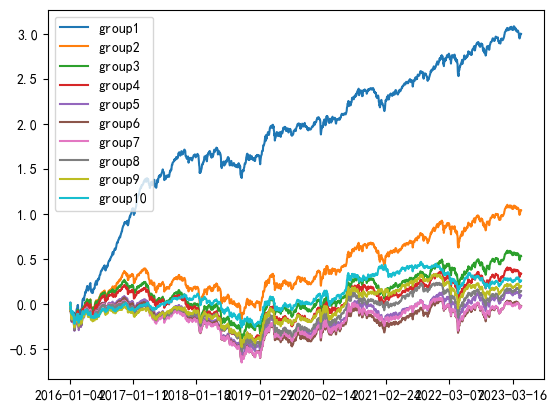

In [5123]:
xy.cal_rate_group(((size.shift(1,axis=1)*xy.filter1).loc[:,'2016-01-04':]),xy.rets.loc[:,'2016-01-04':],group_num=10,masks=1).cumsum().plot()

In [5162]:
((_f[defrank<200]/_f[defrank<200]) * xy.rets).mean().dropna()

2016-01-05   -0.001611
2016-01-06    0.022613
2016-01-07   -0.076742
2016-01-08    0.023312
2016-01-11   -0.051589
                ...   
2023-04-27    0.006550
2023-04-28    0.012037
2023-05-04    0.002890
2023-05-05   -0.004128
2023-05-08    0.016111
Length: 1783, dtype: float64

<Axes: >

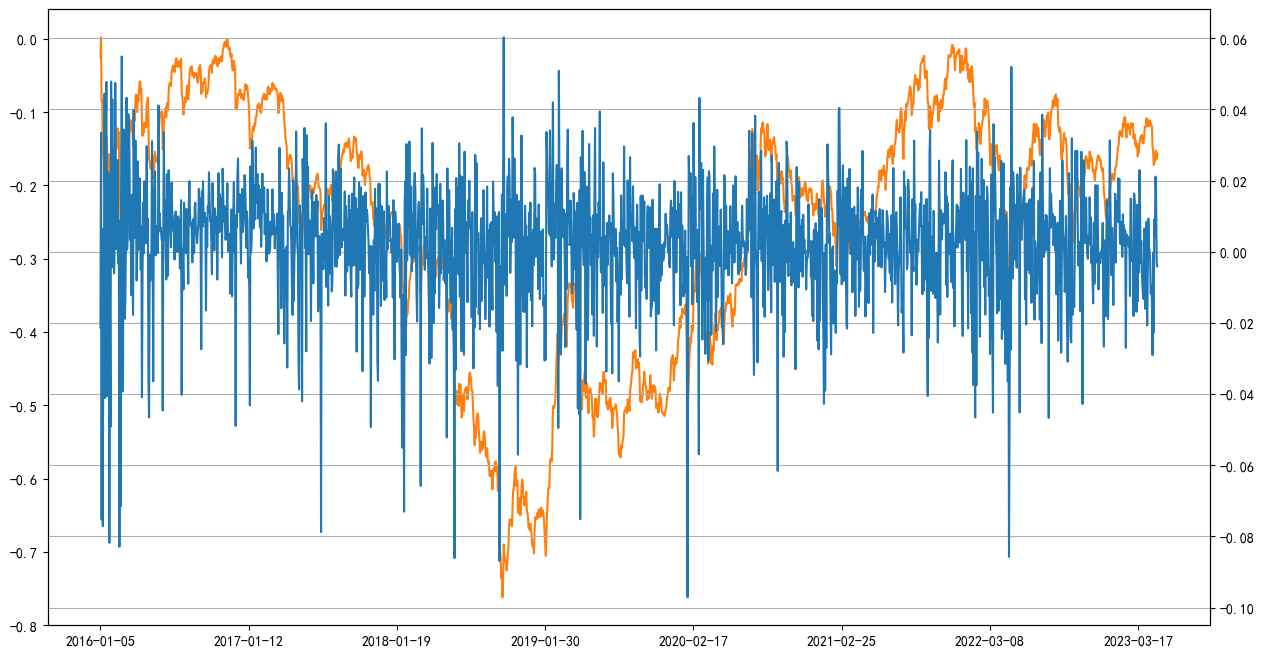

In [5183]:
xx = (((_f[frank<200]/_f[frank<200]) * xy.rets).mean()).dropna().rolling(1).sum()
xx.plot(figsize=(15,8),secondary_y=True,grid=True)
xy.Index_rets.loc['1000',xx.index].cumsum().plot(figsize=(15,8),grid=True)

In [5202]:
_f['2022-12-30'].dropna().sort_values()

688701.SH   -3.406747
688004.SH   -3.349005
300478.SZ   -3.337546
688215.SH   -3.318326
603729.SH   -3.313826
               ...   
300274.SZ    0.991380
300124.SZ    0.991380
300122.SZ    0.991380
300015.SZ    0.991380
000001.SZ    0.991380
Name: 2022-12-30, Length: 4618, dtype: float64

In [5204]:
xy.rets.loc[_f['2022-12-30'].dropna().sort_values()[:200].index,'2022-12-30'].mean()

0.00941391116013969

In [5195]:
xx['2022-12-30']

0.009431036311667999

In [5218]:
xy.Index_rets.loc['50',xx.index].corr(xx.shift(1))

-0.07166554844045972

In [5212]:
_f['2023-01-03'].dropna().sort_values()

688701.SH   -3.419101
688004.SH   -3.355793
300478.SZ   -3.347469
688081.SH   -3.321900
603709.SH   -3.315896
               ...   
600011.SH    0.993476
600009.SH    0.993476
600000.SH    0.993476
600036.SH    0.993476
000001.SZ    0.993476
Name: 2023-01-03, Length: 4618, dtype: float64

In [5213]:
(size*xy.filter1)['2022-12-30'].dropna().sort_values()

688701.SH   -3.419101
688004.SH   -3.355793
300478.SZ   -3.347469
688081.SH   -3.321900
603709.SH   -3.315896
               ...   
600011.SH    0.993476
600009.SH    0.993476
600000.SH    0.993476
600036.SH    0.993476
000001.SZ    0.993476
Name: 2022-12-30, Length: 4618, dtype: float64

<Axes: >

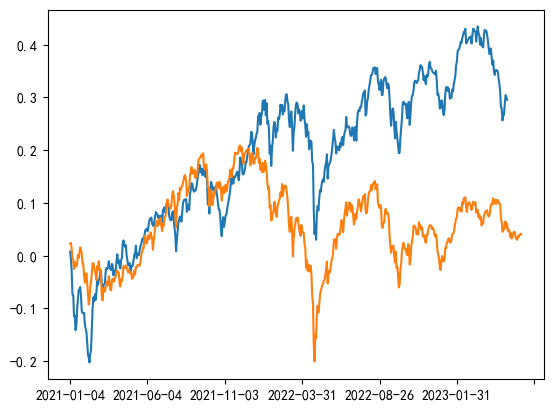

In [5118]:
((((_f[frank<200]/_f[frank<200]) * xy.rets).mean().loc['2021-01-04':]-0.0008).cumsum()).plot()
xy.Index_rets.loc['1000','2021-01-04':].cumsum().plot()

<Axes: >

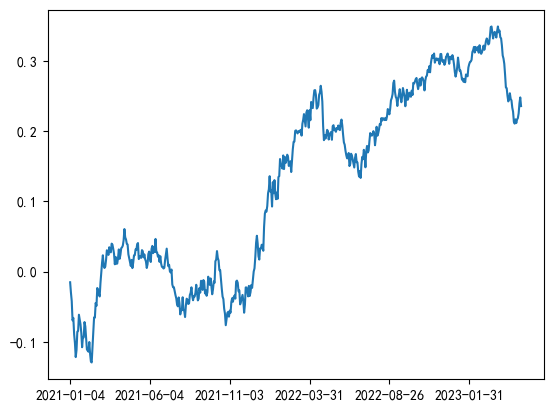

In [5119]:
((((_f[frank<200]/_f[frank<200]) * xy.rets).mean().loc['2021-01-04':]) - xy.Index_rets.loc['1000','2021-01-04':] - 0.0008).dropna().cumsum().plot()

### END

In [7]:
# 使用探测到的编码读取文件
df50 = pd.read_csv('OP510050.csv',index_col=0,header=1)
df500 = pd.read_csv('OP510500.csv',index_col=0,header=1,encoding=encoding)
df300 = pd.read_csv('OP510300.csv',index_col=0,header=1,encoding=encoding)

In [10]:
option50etf = df50['P持仓量'].rolling(1).mean() / df50['C持仓量'].rolling(1).mean()
option300etf = df300['P持仓量'].rolling(1).mean() / df300['C持仓量'].rolling(1).mean()
option500etf = df500['P持仓量'].rolling(1).mean() / df500['C持仓量'].rolling(1).mean()
# option1000etf = df[df.SECURITY_CODE==852].set_index('TRADE_DATE')

In [11]:
CP = pd.concat([
    option50etf.rename('50'),
    # option300etf.rename('300'),
    option300etf.rename('500')
],axis=1).dropna()

0.031238118192992725
1 0.9988221436984688
2 0.9988221436984688


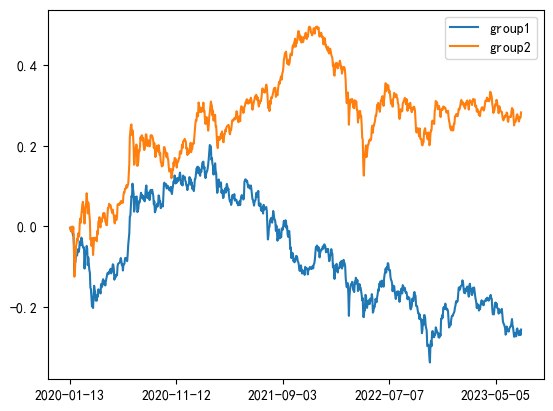

In [12]:
# CP_hedge = CP.rolling(10).apply(lambda x:((x.rank()[-1]/len(x)))).dropna()
CP_qt = CP.rolling(15).apply(lambda x:((x.rank()[-1]/len(x)))).dropna().T.shift(1,axis=1)

# 分组收益率
gr_st_index_CP_mean = xy.cal_rate_group(
    CP_qt,
    # CP_hedge.mask((CP_hedge<0.9) & (CP_hedge>0.1),np.nan).dropna().T.shift(1,axis=1),
    xy.Index_rets.loc[['50', '300', '500', '1000'],:],
    group_num=2,
    masks=1
)
gr_st_index_CP_mean.cumsum().plot()
plt.show()
# xy.Index_rets.loc[['50', '300', '500', '1000'],'2023-02-28':].T.cumsum().plot()

<Axes: >

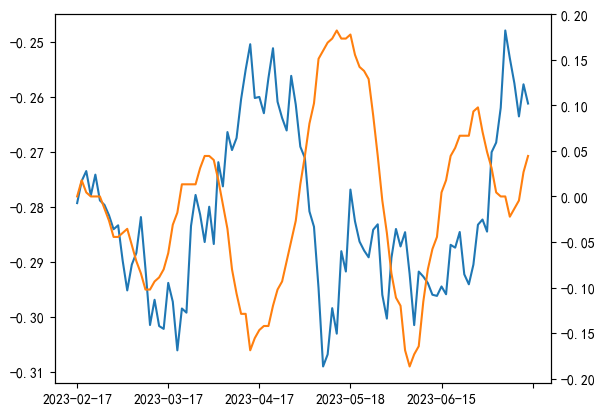

In [13]:
(xy.Index_rets.loc['50',(CP_qt.loc['50'] - CP_qt.loc['500']).index[0]:].T.cumsum() - xy.Index_rets.loc['500',(CP_qt.loc['50'] - CP_qt.loc['500']).index[0]:].T.cumsum())[-100:].plot()
(CP_qt.loc['50'] - CP_qt.loc['500']).rolling(15).mean()[-100:].plot(secondary_y=True)

770.0
yoy: 0.07681971505049343 
 mdd: -0.3192002178528579 
 sharpe: 0.2939900313104841 
 rankIC: 0.031249999999999993 
 rankIR: 0.031238118192992718 
 win%: 0.5111896348645465 
 gain_loss%: -1.0100752094005854


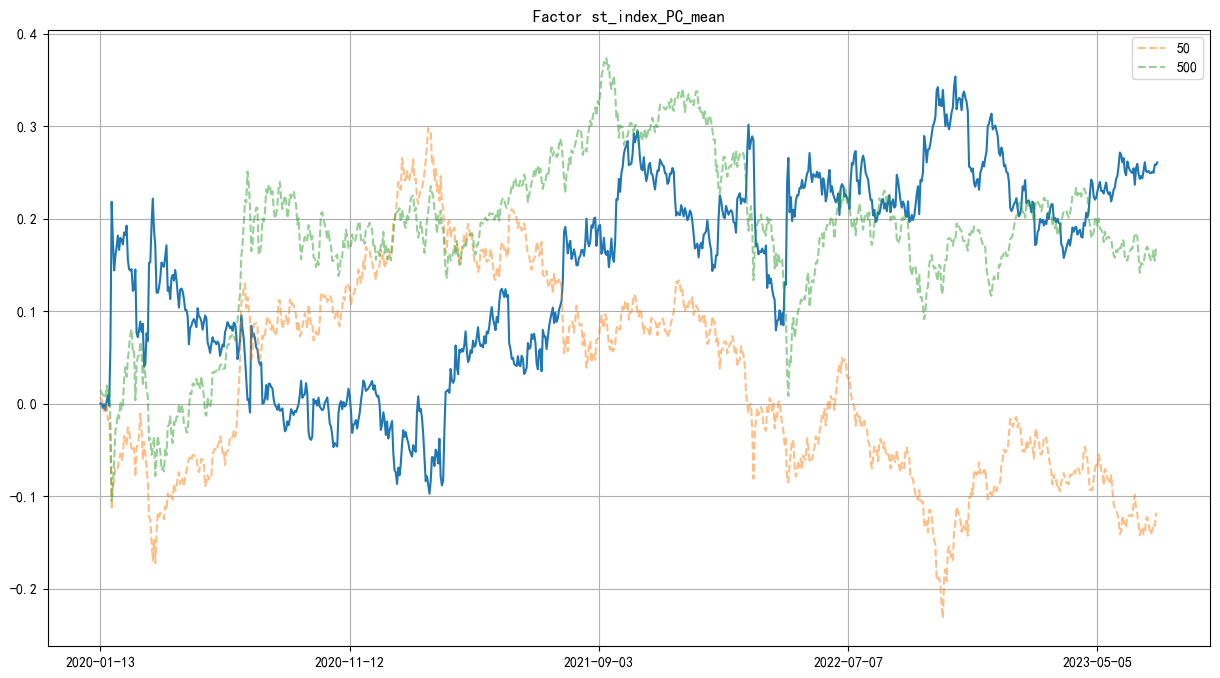

In [14]:
# 单因子强弱
st_index_PC_mean_select, st_index_PC_mean_rets = xy.single_Factor_backtest(
    CP_qt.loc[:,(CP_qt.columns&xy.Index_rets.columns)],
    xy.Index_rets.loc[['50', '500'],(CP_qt.columns&xy.Index_rets.columns)],
    _side=1,
    fee=0.00,
    name='st_index_PC_mean'
)

In [ ]:
# 单因子强弱
ad_select, ad_rets = xy.single_Factor_backtest(
    sts_ad_mean.T.rolling(1).mean().T.loc[['50', '300', '500', '1000'],'2016-02-28':],
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-02-28':],
    _side=1,
    fee=0.000,
    name='ad'
)

In [6173]:
sts_ad11 = (xy.rets.T.rolling(11).mean() / xy.rets.T.rolling(11).std()).T
sts_ad12 = (xy.rets.T.rolling(12).mean() / xy.rets.T.rolling(12).std()).T
sts_ad13 = (xy.rets.T.rolling(13).mean() / xy.rets.T.rolling(13).std()).T
sts_ad14 = (xy.rets.T.rolling(14).mean() / xy.rets.T.rolling(14).std()).T
sts_ad15 = (xy.rets.T.rolling(15).mean() / xy.rets.T.rolling(15).std()).T

_sts_ad_mean = (sts_ad11+sts_ad12+sts_ad13+sts_ad14+sts_ad15)/5
sts_ad_mean = xy.read_Factor(xy.trd_dates,'sts_ad', df=_sts_ad_mean)

In [6174]:
sts_ad_mean

,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,...,2023-04-21,2023-04-24,2023-04-25,2023-04-26,2023-04-27,2023-04-28,2023-05-04,2023-05-05,2023-05-08,2023-05-09
50,-1.124423,-1.130884,-1.319275,-1.348063,-1.322559,-1.386975,-1.400290,0.932324,0.760900,-1.457308,...,1.133058,1.043326,1.013088,1.140513,1.256972,1.243477,1.263988,1.342518,1.259272,1.251728
300,-0.518069,-0.502942,-0.211209,-0.163172,-0.209327,-0.075783,-0.035616,0.782087,0.896053,0.578458,...,0.503519,0.637920,0.669155,0.519596,0.348280,0.373328,0.334426,0.151724,0.315549,0.287197
500,0.577946,0.558593,0.617404,0.671398,0.636166,0.750457,0.777133,-0.699871,-0.478210,0.718219,...,-0.569841,-0.627037,-0.605631,-0.669948,-0.730840,-0.747728,-0.718495,-0.576467,-0.594233,-0.480886
1000,1.064545,1.075233,0.913081,0.839837,0.895719,0.712301,0.658773,-1.014541,-1.178743,0.160630,...,-1.066737,-1.054208,-1.076613,-0.990162,-0.874411,-0.869077,-0.879919,-0.917775,-0.980587,-1.058038


54.0
yoy: 0.13080269206000894 
 mdd: -0.07514871522368871 
 sharpe: 1.0641059639268111 
 rankIC: 0.13599999999999998 
 rankIR: 0.13672524413557738 
 win%: 0.568 
 gain_loss%: -0.8998096391806958


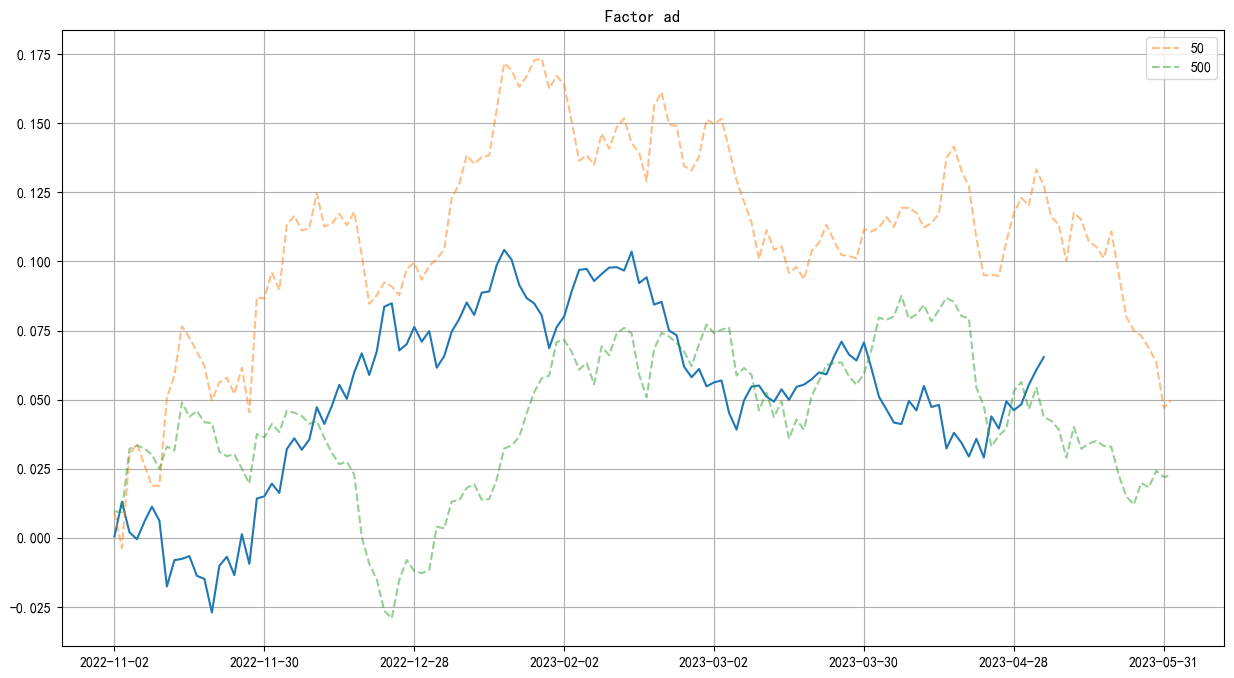

In [6169]:
# 单因子强弱
ad_select, ad_rets = xy.single_Factor_backtest(
    sts_ad_mean.T.rolling(1).mean().T.loc[['50', '500'],'2022-11-02':],
    xy.Index_rets.loc[['50', '500'],'2022-11-02':],
    _side=1,
    fee=0.000,
    name='ad'
)

In [6072]:
import math

In [6073]:
def cal(x):
    y = np.log(x)
    x = np.arange(x.size)
    slope, intercept = np.polyfit(x, y, 1)

    annualized_returns = math.pow(math.exp(slope), 250) - 1
    r_squared = 1 - (sum((y - (slope * x + intercept))**2) / ((len(y) - 1) * np.var(y, ddof=1)))
    
    score = (annualized_returns) * r_squared
    
    return score

In [6086]:
TR50 = pd.concat([
    (xy.index_high.T['300'] - xy.index_low.T['300']),
    (xy.index_high.T['300'] - xy.cl.T['300'].shift(1)),
    (xy.cl.T['300'].shift(1) - xy.index_low.T['300'])
],axis=1).dropna().mean(axis=1).rename('300')
RTR50 = TR50.rolling(20).mean()

In [6079]:
RTR50

2020-01-20    27.767023
2020-01-21    27.230453
2020-01-22    29.358677
2020-01-23    32.923057
2020-02-03    34.916447
                ...    
2023-05-04    26.727947
2023-05-05    27.172367
2023-05-08    28.129750
2023-05-09    29.664187
2023-05-10    29.507593
Name: 300, Length: 799, dtype: float64

<Axes: >

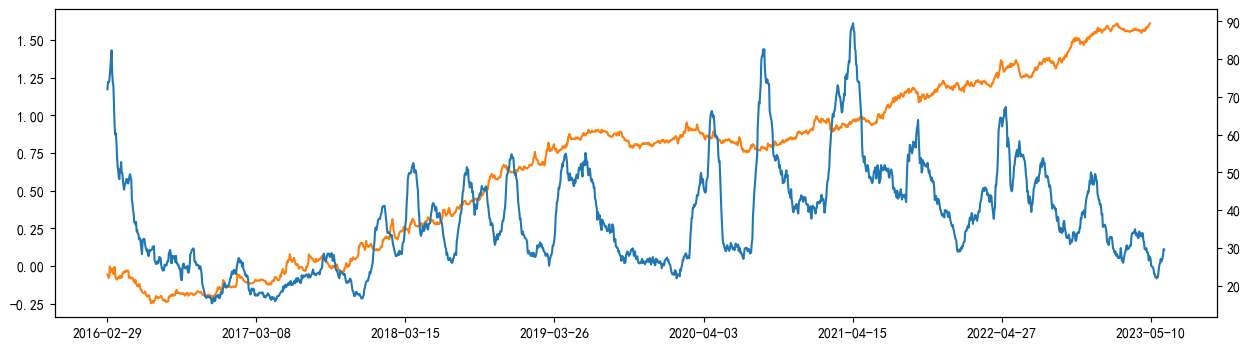

In [6087]:
RTR50.loc['2016-01-20':].plot(figsize=(15,4),grid=True,secondary_y=True)
# st_index_PC_mean_rets['2020-01-20':].cumsum().T.plot(figsize=(15,4))
ad_rets['2016-01-20':].cumsum().T.plot(figsize=(15,4))
# (-xy.Index_rets.loc['50','2020-01-20':].cumsum()+xy.Index_rets.loc['300','2020-01-20':].cumsum()).rolling(1).mean().T.loc[:].plot(secondary_y=True,figsize=(15,4),grid=True)
# xy.Index_rets.loc['300'].T.rolling(10).mean().T.loc[(CP_qt.columns&TR.index)].plot(secondary_y=True,figsize=(15,4))

<Axes: >

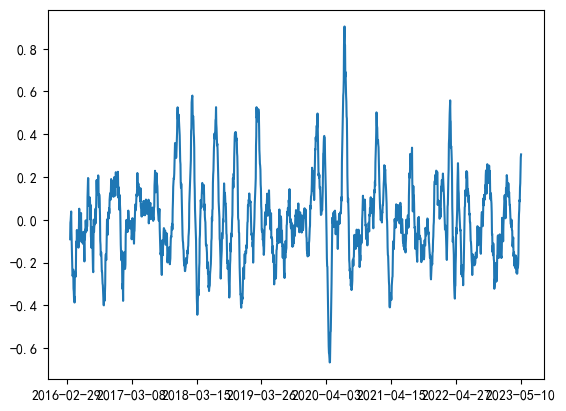

In [6112]:
RTR50.loc[ddt0].pct_change().rolling(13).sum().plot()

In [6093]:
ddt0 = ad_rets.index & RTR50.dropna().index

In [6120]:
ad_rets.loc[ddt0][RTR50.loc[ddt0].pct_change().rolling(13).mean()<-0.04].mean()

0.0034177062727336225

In [6127]:
ad_rets.loc[ddt0][RTR50.loc[ddt0].pct_change().rolling(13).mean()>0.04].mean()

-0.006062703131395506

### 全局百分位

In [5900]:
same_dt = xy.Index_rets.loc['50',:].index & ((option50etf.shift(1).rank()/len(option50etf.shift(1)))).index

In [1388]:
sig = (option50etf.shift(0).rank()/option50etf.shift(0).shape[0])

<Axes: >

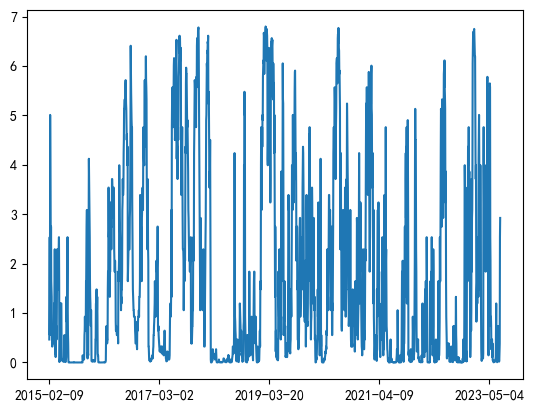

In [1406]:
((sig/0.5)**3).plot()

In [1414]:
short = (xy.Index_rets.loc['50',same_dt][(sig>0.8).loc[same_dt].values]).loc['2016-01-04':].rename('收益率')
short_df = pd.concat([
    short,
    pd.Series(-1,short.index).rename('方向'),
    pd.Series(sig,short.index).rename('P/C全局百分位')
],axis=1)

long = (xy.Index_rets.loc['50',same_dt][(sig<0.2).loc[same_dt].values]).loc['2016-01-04':].rename('收益率')
long_df = pd.concat([
    long,
    pd.Series(1,long.index).rename('方向'),
    pd.Series(sig,long.index).rename('P/C全局百分位')
],axis=1)

empt = (xy.Index_rets.loc['50',same_dt][((sig>=0.2) & (sig<=0.8)).loc[same_dt].values]).loc['2016-01-04':].rename('收益率')
empt_df = pd.concat([
    empt,
    pd.Series(np.nan,empt.index).rename('方向'),
    pd.Series(sig,empt.index).rename('P/C全局百分位')
],axis=1)

In [1415]:
CPratio_res50_03 = pd.concat([
    long_df,
    short_df,
    empt_df
]).sort_index()

In [1416]:
CPratio_res50_03['方向'] = CPratio_res50_03['方向'].ffill()

CPratio_res50_03['未扣费累计收益'] = (CPratio_res50_03.收益率 * CPratio_res50_03.方向.shift(1)).cumsum()
CPratio_res50_03['扣费累计收益'] = (CPratio_res50_03.收益率 * CPratio_res50_03.方向.shift(1) - 0.001).cumsum()
CPratio_res50_03['百分位阈值'] = '0.3/0.7'

<Axes: >

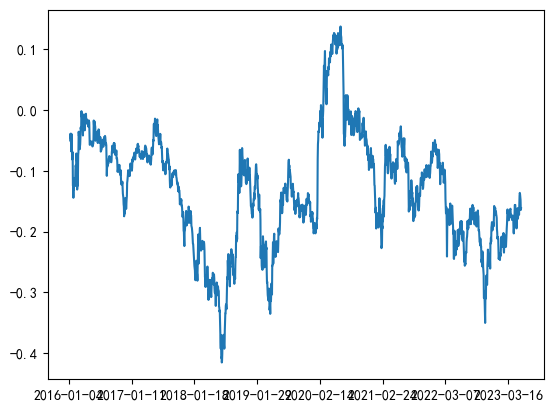

In [1417]:
CPratio_res50_03['P/C'] = option50etf.shift(1)

CPratio_res50_03['未扣费累计收益'].plot()

In [1418]:
CPratio_res50_03.dropna()

,收益率,方向,P/C全局百分位,未扣费累计收益,扣费累计收益,百分位阈值,P/C
2016-01-11,-0.044773,1.0,0.057070,-0.044773,-0.045773,0.3/0.7,60.0
2016-01-12,0.005251,1.0,0.049908,-0.039521,-0.041521,0.3/0.7,55.0
2016-01-13,-0.012134,1.0,0.044362,-0.051655,-0.054655,0.3/0.7,54.0
2016-01-14,0.012619,1.0,0.027726,-0.039036,-0.043036,0.3/0.7,53.0
2016-01-15,-0.028680,1.0,0.023799,-0.067716,-0.072716,0.3/0.7,49.0
...,...,...,...,...,...,...,...
2023-05-26,-0.001907,1.0,0.176756,-0.138404,-1.931404,0.3/0.7,66.0
2023-05-29,-0.004426,1.0,0.144409,-0.142830,-1.936830,0.3/0.7,66.0
2023-05-30,-0.005157,1.0,0.116913,-0.147987,-1.942987,0.3/0.7,64.0
2023-05-31,-0.016486,1.0,0.080176,-0.164473,-1.960473,0.3/0.7,62.0


<Axes: >

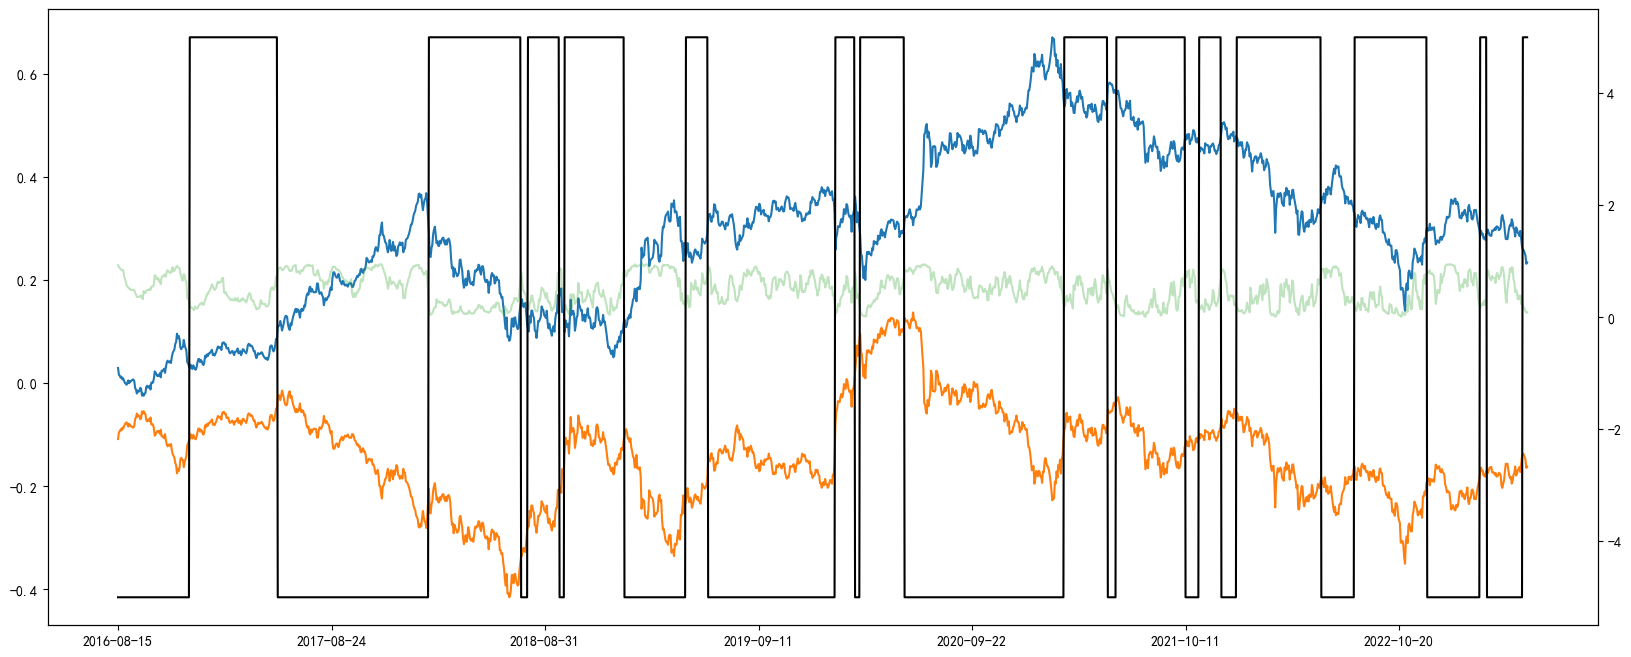

In [1419]:
CPratio_res50_03['收益率'].loc['2016-08-14':].cumsum().plot(figsize=(20,8))
CPratio_res50_03['未扣费累计收益'].loc['2016-08-14':].plot(figsize=(20,8))
CPratio_res50_03['P/C全局百分位'].loc['2016-08-14':].plot(secondary_y=True,figsize=(20,8),alpha=0.3)
CPratio_res50_03['P/C全局百分位'].map(lambda x:-5 if x>0.8 else(5 if x<0.2 else np.nan)).ffill().loc['2016-08-14':].plot(secondary_y=True,figsize=(20,8),color='black')

In [979]:
# pd.concat([
#     CPratio_res50_01,
#     CPratio_res50_02,
#     CPratio_res50_03
# ]).to_excel('CPratio_res50_quantile.xlsx')

### 滚动百分位

In [4944]:
imp.reload(xy)

<module 'xy' from 'E:\\PyProject\\factors\\CPoption\\xy.py'>

In [22]:
TR = pd.concat([
    (xy.index_high.T['50'] - xy.index_low.T['50']),
    (xy.index_high.T['50'] - xy.cl.T['50'].shift(1)),
    (xy.cl.T['50'].shift(1) - xy.index_low.T['50'])
],axis=1).dropna().max(axis=1)

ATR15 = TR.rolling(20).mean().dropna()

-0.02597350257120088

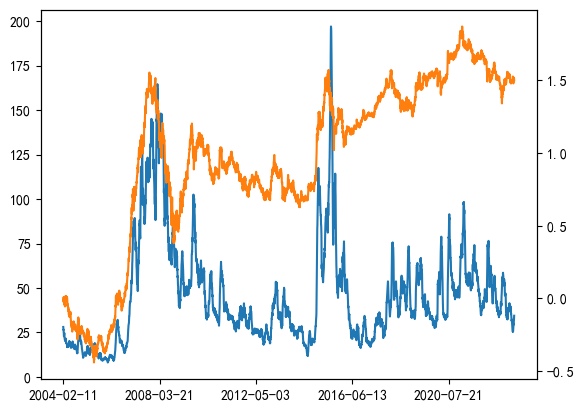

In [23]:
ATR15.plot()
xy.Index_rets.loc['50',ATR15.index].cumsum().plot(secondary_y=True)
ATR15.shift(1).corr(xy.Index_rets.loc['50',ATR15.index])

In [24]:
same_dt = xy.Index_rets.loc['50',:].index & ((ATR15.shift(0).rank()/len(ATR15.shift(0)))).index

In [25]:
same_dt = xy.Index_rets.loc['50',:].index & ((option50etf.shift(0).rank()/len(option50etf.shift(0)))).index

In [5637]:
# sig.dropna().loc[same_dt].plot(figsize=(20,8))

# sig.rolling(240).apply(lambda x:((x.rank()[-1]/len(x)))).plot(figsize=(20,8),alpha=0.3)
# sig.plot(figsize=(20,8))
# sig.loc[same_dt].loc['2016-02-09':'2023-08-16'].shift(1).plot(figsize=(20,8),grid=True,alpha=0.5)
# sig.loc[same_dt].loc['2019-02-09':'2023-08-16'].map(lambda x: 1 if x>0.6 else (np.nan if x>0.4 else -1)).ffill().shift(1).plot(figsize=(20,8),grid=True,color='black')
# sig = ((sig/sig.rolling(20).mean())**30).map(lambda x:1 if x>1 else x)
# sig.plot(figsize=(20,8))
# ((sig/sig.rolling(20).mean())**30).map(lambda x:1 if x>1 else x).plot(figsize=(20,8))
# sig.plot(figsize=(20,8))
# (option50etf**10).map(lambda x:-5 if x>3 else(5 if x<0.2 else np.nan)).ffill().dropna().loc[same_dt].plot(figsize=(20,8))
# (sig.loc[same_dt].loc['2016-02-09':'2023-08-16'].map(lambda x: 1 if x>0.8 else (np.nan if x>0.2 else -1)).ffill().shift(1) * xy.Index_rets.loc['50',same_dt].loc['2016-02-09':'2023-08-16']).cumsum().plot(figsize=(20,8),secondary_y=True)
# xy.Index_rets.loc['50',same_dt].loc['2016-02-09':'2023-08-16'].cumsum().plot(figsize=(20,8),secondary_y=True)
# (p_chg50.dropna().loc[same_dt]).rolling(5).mean().loc['2020-08-14':].plot(figsize=(20,8))
# (c_chg50.dropna().loc[same_dt]).rolling(5).mean().loc['2020-08-14':].plot(figsize=(20,8))



In [5589]:
# P/C上升，大多数情况是P减得比C慢

In [26]:
def cal_downdraw(arr):
    if len(arr) == 0:
        return 0
        
    I = np.argmax(np.maximum.accumulate(arr.cumsum()) - arr.cumsum()) 
    # print(I)
    if (I == 0) & any(arr<0):
        return  abs(arr[0])
    elif (I == len(arr)) & any(arr<0):
        return  abs(arr.sum())
    elif all(arr>=0):
        return -abs(arr.sum())
    
    J = np.argmax(arr.cumsum()[:I])
    # print(I,J)
    # print(arr.cumsum()[J], arr.cumsum()[I], arr.cumsum()[J] - arr.cumsum()[I])
    return arr.cumsum()[J] - arr.cumsum()[I]

def cal_pnl_win_cutloss(x,shrd_loss):
    # display(x)
    if len(x) == 1:
        return x.index[0], max(-shrd_loss, x.values[0])
    elif all(np.isclose(x,0.0)):
        return x.index[0], 0
    else:
        for i in range(x.shape[0]):
            # print(x[:i+1])
            
            mdd = -cal_downdraw(x[:i+1])
            pre_mdd = -cal_downdraw(x[:i])
            shrd_pre_mdd = abs(shrd_loss + pre_mdd)
            # print(x.index[i],pre_mdd,mdd,x[:i].sum(),x[i])
            if mdd < -shrd_loss:
                return x.index[i], max(x[:i+1].sum(),-shrd_loss)#x[:i].sum() - shrd_pre_mdd

    return x.index[i], x[:i+1].sum()

def cal_pnl_win_cutprofit(x):
    if len(x) == 1:
        return x.index[0], min(shrd_profit, x.values[0])
    elif all(np.isclose(x,0.0)):
        return x.index[0], 0
    else:
        for i in range(x.shape[0]):
            mp = x[:i+1].sum()
            if mp >= shrd_profit:
                return x.index[i], shrd_profit

    return x.index[i], x[:i+1].sum()

def cal_pnl_win_cutboth(x):
    if len(x) == 1:
        return x.index[0], x.values[0]
    elif all(np.isclose(x,0.0)):
        return x.index[0], 0
    else:
        for i in range(x.shape[0]):
            mdd = -cal_downdraw(x[:i+1])
            pre_mdd = -cal_downdraw(x[:i])
            shrd_pre_mdd = abs(shrd_loss + pre_mdd)
            mp = x[:i+1].sum()
            if (mp >= shrd_profit) & (mdd > -shrd_loss):
                return x.index[i], shrd_profit
            elif (mdd < -shrd_loss) & (mp <= shrd_profit):
                return x.index[i], max(x[:i+1].sum(),-shrd_loss)#-shrd_loss#x[:i].sum() - shrd_pre_mdd
            else:
                pass

    return x.index[i], x[:i+1].sum()

In [27]:
shrd_loss = 0.02
shrd_profit = 0.02

In [28]:
open_shrd = 0.80
close_shrd = 0.6

In [29]:
def loop(
    same_dt,
    option50etf,
    side = 1,
    win_size = 60,
    open_shrd = 0.80,
    close_shrd = 0.6,
    shrd_loss = 0.02
):
    sig = (option50etf).loc[same_dt].rolling(win_size).apply(lambda x:((x.rank()[-1]/len(x))))
    short = (xy.Index_rets.loc['50',same_dt][(sig.rolling(1).mean()>open_shrd).loc[same_dt].values]).loc['2016-01-04':].rename('收益率')
    short_df = pd.concat([
        short,
        pd.Series(-1*side,short.index).rename('方向'),
        pd.Series((sig),short.index).rename('P/C240日百分位')
    ],axis=1)

    long = (xy.Index_rets.loc['50',same_dt][((sig.rolling(1).mean())<(1-open_shrd)).loc[same_dt].values]).loc['2016-01-04':].rename('收益率')
    long_df = pd.concat([
        long,
        pd.Series(1*side,long.index).rename('方向'),
        pd.Series((sig),long.index).rename('P/C240日百分位')
    ],axis=1)

    empt = (xy.Index_rets.loc['50',same_dt][(((sig.rolling(1).mean())>=(1-open_shrd)) & (sig.rolling(1).mean()<=open_shrd)).loc[same_dt].values]).loc['2016-01-04':].rename('收益率')
    empt_df = pd.concat([
        empt,
        pd.Series(np.nan,empt.index).rename('方向'),
        pd.Series((sig),empt.index).rename('P/C240日百分位')
    ],axis=1)

    # 信号序列
    CPratio_res50_02 = pd.concat([
        long_df,
        short_df,
        empt_df
    ]).sort_index()

    pre_side = np.nan
    long_dates = []
    short_dates = []
    for _d, _row in CPratio_res50_02.iterrows():
        # print(pre_side,_row.方向,_row['P/C240日百分位'])
        if np.isnan(_row.方向) & (pre_side>0) & (_row['P/C240日百分位']>=close_shrd):
            # print(_d)
            long_dates.append(_d)
            pre_side = _row.方向

        elif np.isnan(_row.方向) & (pre_side<0) & (_row['P/C240日百分位']<=(1-close_shrd)):
            short_dates.append(_d)
            pre_side = _row.方向

        else:
            pre_side = _row.方向
            continue
    org_ic = CPratio_res50_02['收益率'][:].corr(CPratio_res50_02['方向'][:].shift(1))
    
    CPratio_res50_02.loc[long_dates,'方向'] = 1
    CPratio_res50_02.loc[short_dates,'方向'] = -1
    CPratio_res50_02['方向'] = CPratio_res50_02['方向'].shift(1)
    
    shrd_ic = CPratio_res50_02['收益率'][:].corr(CPratio_res50_02['方向'][:])
    
    print(org_ic,shrd_ic)
    
    CPratio_res50_02['方向1'] = CPratio_res50_02['方向'].fillna(0)

    CPratio_res50_02['ret'] = CPratio_res50_02['收益率'] * CPratio_res50_02['方向1']
    CPratio_res50_02['flag'] = (CPratio_res50_02['方向1']!=CPratio_res50_02['方向1'].shift(1)).cumsum()

    ddct = dict(zip(CPratio_res50_02['flag'][(CPratio_res50_02['方向1']!=CPratio_res50_02['方向1'].shift(1))].values,
                    CPratio_res50_02['flag'][(CPratio_res50_02['方向1']!=CPratio_res50_02['方向1'].shift(1))].index))

    CPratio_res50_02['flag'] = CPratio_res50_02['flag'].map(lambda x:ddct[x])

    CPratio_res50_02 = CPratio_res50_02[~pd.isna(CPratio_res50_02['ret'])]

    ss = CPratio_res50_02.groupby('flag')['ret'].apply(cal_pnl_win_cutloss, shrd_loss=shrd_loss).map(lambda x:x[1])
    pp = CPratio_res50_02.groupby('flag')['ret'].apply(cal_pnl_win_cutprofit).map(lambda x:x[1])
    bb = CPratio_res50_02.groupby('flag')['ret'].apply(cal_pnl_win_cutboth).map(lambda x:x[1])

    ss_date = CPratio_res50_02.groupby('flag')['ret'].apply(cal_pnl_win_cutloss, shrd_loss=shrd_loss).map(lambda x:x[0])
    pp_date = CPratio_res50_02.groupby('flag')['ret'].apply(cal_pnl_win_cutprofit).map(lambda x:x[0])
    bb_date = CPratio_res50_02.groupby('flag')['ret'].apply(cal_pnl_win_cutboth).map(lambda x:x[0])

    CPratio_res50_02['win_cutloss_pnl'] = pd.Series(pd.Series(ss.values,index=ss_date.values),CPratio_res50_02.index)
    CPratio_res50_02['win_cutprofit_pnl'] = pd.Series(pd.Series(pp.values,index=pp_date.values),CPratio_res50_02.index)
    CPratio_res50_02['win_cutboth_pnl'] = pd.Series(pd.Series(bb.values,index=bb_date.values),CPratio_res50_02.index)


    CPratio_res50_02['未扣费累计收益'] = CPratio_res50_02.ret.cumsum()
    CPratio_res50_02['百分位阈值'] = f'{1-open_shrd}/{open_shrd}'

    CPratio_res50_02['P/C'] = option50etf
    CPratio_res50_02['未扣费累计收益'].loc['2016-01-14':].rename('fall_cut_0.5').plot(figsize=(20,8),legend=True)
    CPratio_res50_02['P/C'].loc['2016-01-14':].plot(figsize=(20,8),grid=True,alpha=0.3)

    # CPratio_res50_02['P/C240日百分位'].loc['2016-08-14':].map(lambda x: 1 if x>0.6 else (np.nan if x>0.4 else -1)).ffill().shift(1).plot(figsize=(20,8),grid=True,color='black')

    CPratio_res50_02['win_cutloss_pnl'].fillna(0).cumsum().loc['2016-01-14':].rename('cut_loss').plot(figsize=(20,8),grid=True,legend=True)
    CPratio_res50_02['收益率'].cumsum().rename('指数').loc['2016-01-14':].plot(figsize=(20,8),alpha=0.3,legend=True)
    (sig.loc['2016-01-14':].map(lambda x: -1*side if x>open_shrd else (np.nan if x>(1-open_shrd) else 1*side)).ffill().shift(1) * xy.Index_rets.loc['50',:].loc['2016-01-14':]).cumsum().rename('no_cut').plot(
        figsize=(20,8),
        style='-',
        legend=True,
        grid=True,
        title=f's:{side}_w:{win_size}_o:{open_shrd}_c:{close_shrd}'
    )
    
    sharpe_no_cut = (CPratio_res50_02['ret'].dropna().sum())/len(CPratio_res50_02['ret'].dropna())*250 /  ((CPratio_res50_02['ret'].dropna().std()* 250**0.5))
    sharpe_shrd_cut = (CPratio_res50_02['win_cutloss_pnl'].fillna(0).dropna().sum())/len(CPratio_res50_02['win_cutloss_pnl'].fillna(0).dropna())*250 /  ((CPratio_res50_02['win_cutloss_pnl'].fillna(0).dropna().std()* 250**0.5))
    
    res_dct = {
    '百分位阈值':CPratio_res50_02['百分位阈值'][-1],
    '未扣费累计收益':CPratio_res50_02['未扣费累计收益'][-1],
    '扣费累计收益':CPratio_res50_02['未扣费累计收益'][-1]-CPratio_res50_02[:].方向1.diff().abs().sum()*0.0005,
    '最大回撤':-xy.cal_downdraw(CPratio_res50_02['ret']),
    '夏普':sharpe_no_cut,
    '胜率':CPratio_res50_02.ret[CPratio_res50_02.ret>0].dropna().count() / CPratio_res50_02.ret[CPratio_res50_02.ret!=0].dropna().count(), 
    '盈亏比':CPratio_res50_02.ret[CPratio_res50_02.ret>0].sum() / CPratio_res50_02.ret[CPratio_res50_02.ret<0].sum(), 
        
    f'因子回调+止损未扣费累计收益':CPratio_res50_02['win_cutloss_pnl'].fillna(0).cumsum()[-1],
    f'因子回调+止损扣费累计收益':CPratio_res50_02['win_cutloss_pnl'].fillna(0).cumsum()[-1]-CPratio_res50_02[:].方向1.diff().abs().sum()*0.0005,
    f'因子回调+止损最大回撤':-xy.cal_downdraw(CPratio_res50_02['win_cutloss_pnl'].fillna(0)),
    f'因子回调+止损夏普':sharpe_shrd_cut,
    '原始IC':org_ic,
    '回调IC':shrd_ic,
    '因子方向':side,
    '窗宽':win_size,
    '开仓阈值':open_shrd,
    '回调平仓阈值':close_shrd,
    '因子回调+止损胜率':CPratio_res50_02['win_cutloss_pnl'][CPratio_res50_02['win_cutloss_pnl']>0].count() / CPratio_res50_02['win_cutloss_pnl'][CPratio_res50_02['win_cutloss_pnl']!=0].count(), 
    '因子回调+止损盈亏比':CPratio_res50_02['win_cutloss_pnl'][CPratio_res50_02['win_cutloss_pnl']>0].sum() / CPratio_res50_02['win_cutloss_pnl'][CPratio_res50_02['win_cutloss_pnl']<0].sum(),
    
    }
    
    return res_dct, CPratio_res50_02

In [30]:
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt

sides = [-1,1]
win_sizes = [5,10,15,20,30,40,60,180]
open_shrds = [0.6,0.7,0.8,0.9,0.95,0.99]
close_shrds = [0.5,0.6,0.7,0.8]
shrd_losses = [0.02, 0.03, 0.05, 0.1]

In [31]:
all_results = {}
all_results_dfs = {}
# for side in sides:
#     for win_size in win_sizes:
#         for open_shrd in open_shrds:
#             for close_shrd in close_shrds:
#                 if close_shrds <= open_shrds:
#                     res_dct = loop(same_dt, option50etf, side=side, win_size=win_size, open_shrd=open_shrd, close_shrd=close_shrd)
#                     all_results[f's{side}_w{win_size}_o{open_shrd}_c{close_shrd}'] = res_dct
#                 else: 
#                     continue
for side, win_size, open_shrd, close_shrd, shrd_loss in tqdm(product(sides, win_sizes, open_shrds, close_shrds, shrd_losses)):
    if close_shrd <= open_shrd:
        print(f's:{side}_w:{win_size}_o:{open_shrd}_c:{close_shrd}_cutloss:{shrd_loss}')
        res_dct, res_df = loop(same_dt, option50etf, side=side, win_size=win_size, open_shrd=open_shrd, close_shrd=close_shrd, shrd_loss=shrd_loss)
        all_results[f's:{side}_w:{win_size}_o:{open_shrd}_c:{close_shrd}_cutloss:{shrd_loss}'] = res_dct
        res_df.to_csv(f'result/s{side}_w{win_size}_o{open_shrd}_c{close_shrd}_cutloss{shrd_loss}.csv')
        display(pd.Series(res_dct))
        plt.show()
    else:
        continue

0it [00:00, ?it/s]

s:-1_w:5_o:0.6_c:0.5_cutloss:0.02
0.07343491645698201 0.05599396662773011


0it [00:02, ?it/s]


KeyboardInterrupt: 

In [ ]:
pd.DataFrame(all_results).T.sort_values('因子回调+止损胜率',ascending=False)

In [ ]:
pd.DataFrame(all_results).T.to_excel('all_results.xlsx')

In [5749]:
res_df

,收益率,方向,P/C240日百分位,方向1,ret,flag,win_cutloss_pnl,win_cutprofit_pnl,win_cutboth_pnl,未扣费累计收益,百分位阈值,P/C
2016-01-04,-0.062103,NaN,0.777778,0.0,-0.0,2016-01-04,0.0,0.0,0.0,-0.000000,0.010000000000000009/0.99,0.807917
2016-01-05,0.007775,NaN,0.661111,0.0,0.0,2016-01-04,NaN,NaN,NaN,0.000000,0.010000000000000009/0.99,0.707534
2016-01-06,0.012907,NaN,0.638889,0.0,0.0,2016-01-04,NaN,NaN,NaN,0.000000,0.010000000000000009/0.99,0.702487
2016-01-07,-0.059137,NaN,0.627778,0.0,-0.0,2016-01-04,NaN,NaN,NaN,0.000000,0.010000000000000009/0.99,0.695279
2016-01-08,0.017896,NaN,0.355556,0.0,0.0,2016-01-04,NaN,NaN,NaN,0.000000,0.010000000000000009/0.99,0.595804
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-26,-0.001907,NaN,0.177778,0.0,-0.0,2023-01-18,NaN,NaN,NaN,-0.207729,0.010000000000000009/0.99,0.656661
2023-05-29,-0.004426,NaN,0.133333,0.0,-0.0,2023-01-18,NaN,NaN,NaN,-0.207729,0.010000000000000009/0.99,0.635870
2023-05-30,-0.005157,NaN,0.111111,0.0,-0.0,2023-01-18,NaN,NaN,NaN,-0.207729,0.010000000000000009/0.99,0.616981
2023-05-31,-0.016486,NaN,0.077778,0.0,-0.0,2023-01-18,NaN,NaN,NaN,-0.207729,0.010000000000000009/0.99,0.578451


0.06583888021412869 0.07243409278745573


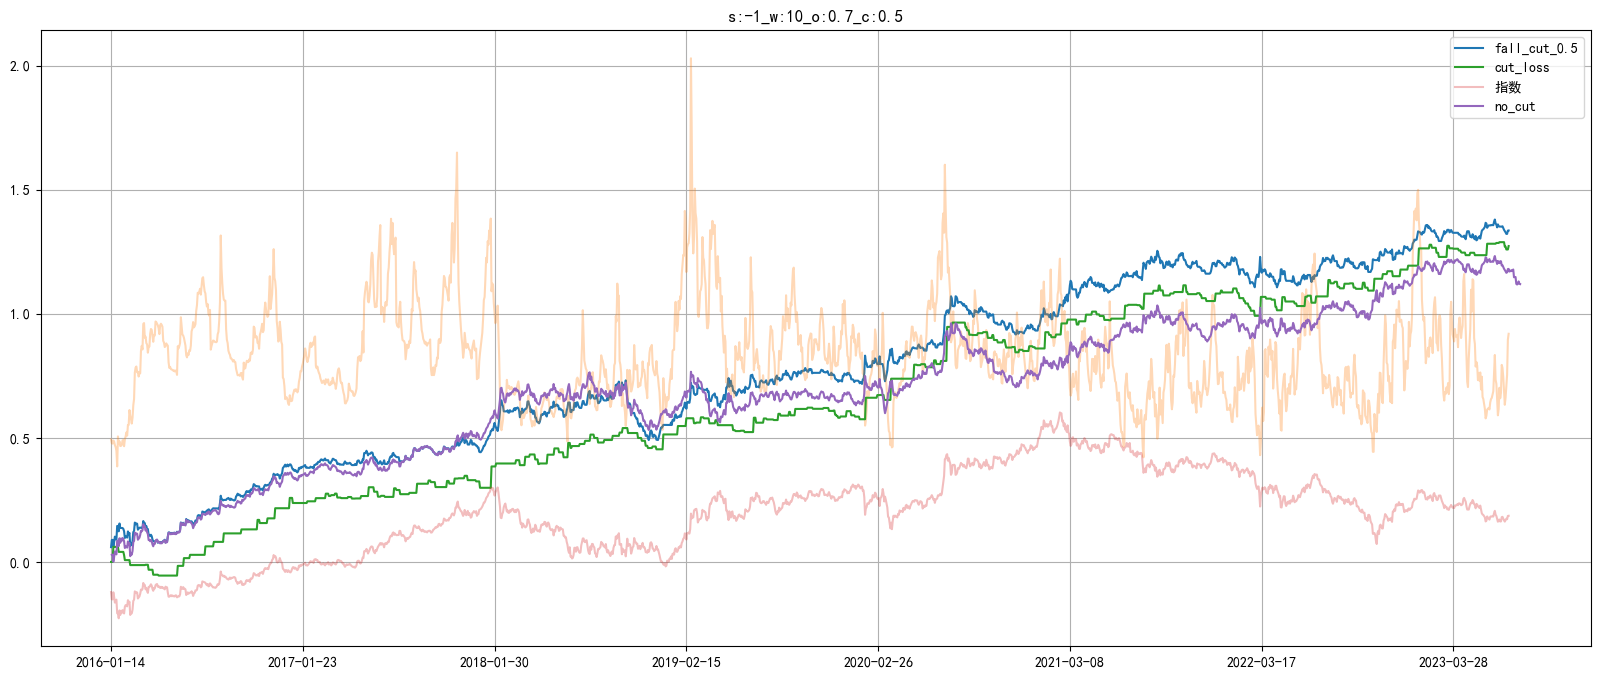

In [81]:
res_dct = loop(
    same_dt,
    option50etf,
    side = -1,    
    win_size = 10,
    open_shrd = 0.7,
    close_shrd = 0.5, 
    shrd_loss = 0.02
)

<Axes: >

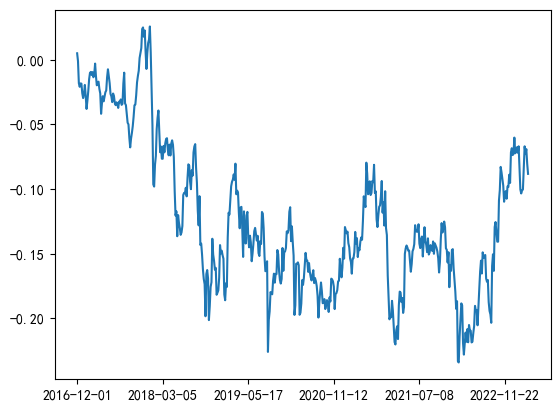

In [134]:
res_dct[1]['收益率'].loc[long.index&res_dct[1]['收益率'].index].cumsum().plot()

<Axes: >

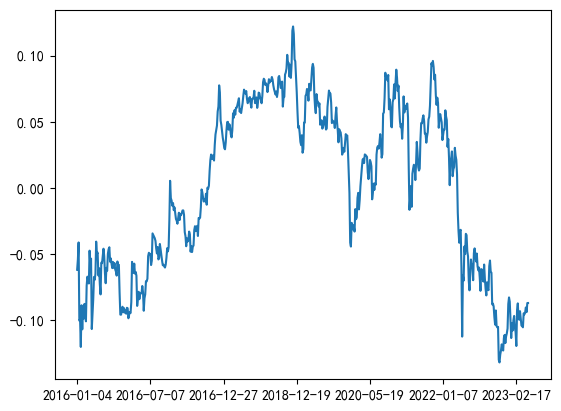

In [133]:
res_dct[1]['收益率'].loc[short.index&res_dct[1]['收益率'].index].cumsum().plot()

In [90]:
index_name = '50'
start_date = '2008-01-04'

In [91]:
STD120 = (xy.cl.loc[index_name,:].pct_change().rolling(250).std()).loc['2006-04-30':].dropna()
TOV120 = (xy.index_tov.loc[index_name,:].rolling(250).mean()).loc['2006-04-30':].dropna()

VOL120_diff = (xy.index_volume.loc[index_name,:].rolling(5).mean()).loc['2006-04-30':].dropna() - (xy.index_volume.loc[index_name,:].rolling(20).mean()).loc['2006-04-30':].dropna()

In [92]:
std_down_diff = STD120.rolling(5).mean() - STD120.rolling(10).mean()
tov_down_diff = TOV120.rolling(5).mean() - TOV120.rolling(10).mean()
tov_down_diff2 = tov_down_diff.rolling(1).mean() - tov_down_diff.rolling(5).mean()

In [132]:
long = pd.Series(res_dct[1]['收益率'],index=tov_down_diff[(((tov_down_diff).rolling(1).sum().shift(1) > 0.00) & (std_down_diff.shift(1)>0.0))].index).loc[start_date:'2023-08-10']
short = pd.Series(res_dct[1]['收益率'],index=tov_down_diff[(((tov_down_diff).rolling(1).sum().shift(1) < 0.00) & (std_down_diff.shift(1)<0.0))].index).loc[start_date:'2023-08-10']
idxs = pd.Series(pd.concat([long.dropna(),-short.dropna()])).sort_index().loc[start_date:].index

In [124]:
tov_down_diff[(((tov_down_diff**(1)).rolling(1).sum().shift(1) != 0.00) & (tov_down_diff2.shift(1)>0.0))].index

Index(['2006-05-26', '2006-06-07', '2006-06-08', '2006-06-09', '2006-06-12',
       '2006-06-13', '2006-06-30', '2006-07-03', '2006-07-04', '2006-07-05',
       ...
       '2023-04-24', '2023-04-25', '2023-04-26', '2023-04-27', '2023-04-28',
       '2023-05-04', '2023-05-05', '2023-05-08', '2023-05-09', '2023-05-10'],
      dtype='object', length=2042)

<Axes: >

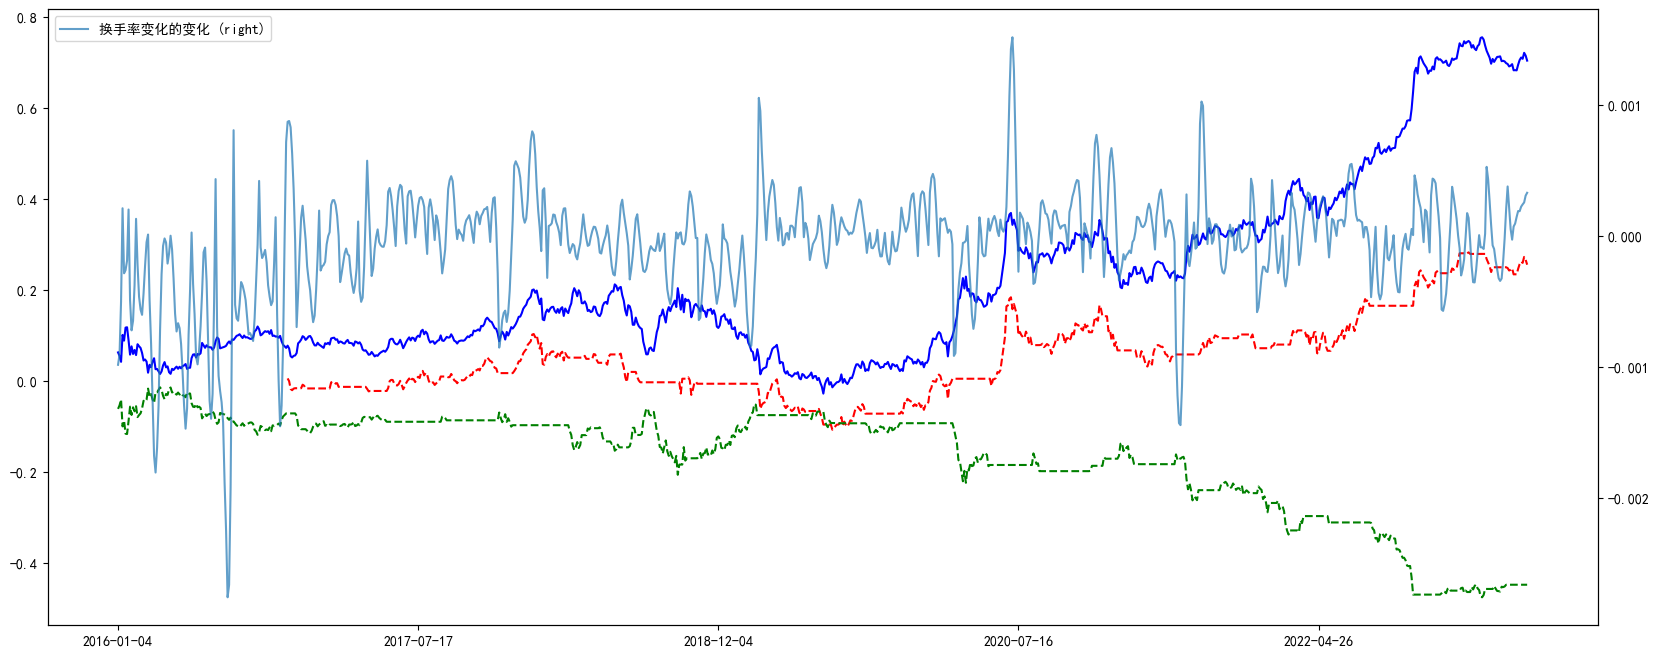

In [129]:
# TOV120.rolling(1).mean().loc[start_date:].dropna().rename('换手率').plot(legend=True,alpha=0.3,)
# xy.cl.loc['300',:].pct_change().rolling(250).std().loc['2009-04-30':'2023-08-10'].dropna().rename('波动率').plot(legend=True,secondary_y=True,alpha=0.3)
# ((xy.index_tov.loc['300',:].rolling(250).mean()/xy.cl.loc['300',:].pct_change().rolling(250).std())**(1/3)).loc['2006-04-30':].dropna().rename('换手率/波动率').plot(legend=True,alpha=1)
# (xy.cl.loc[index_name,start_date:'2023-08-10'].pct_change().cumsum().dropna()).plot(legend=True,color='black',figsize=(20,8))
# DIFF.loc['2006-04-30':].dropna().rolling(20).mean().rename('换手率/波动率').plot(secondary_y=True,legend=True,alpha=1)
# ((std_down_diff).dropna()).rolling(1).sum().loc['2017-01-04':].rename('波动率变化').plot(legend=True,alpha=0.3,secondary_y=True)
# ((tov_down_diff).dropna()).rolling(1).sum().loc[start_date:].rename('换手率变化').plot(legend=True,alpha=0.3,secondary_y=True)
pd.Series(tov_down_diff2,index = idxs).loc[start_date:].rename('换手率变化的变化').plot(legend=True,alpha=0.7,secondary_y=True)

pd.Series(long.fillna(0),index = idxs ).cumsum().ffill().plot(color='red',figsize=(20,8),grid=True,style='--')
pd.Series(short.fillna(0),index = idxs).cumsum().ffill().plot(color='green',figsize=(20,8),grid=True,style='--')
pd.Series(pd.concat([long.dropna(),-short.dropna()])).sort_index().loc[start_date:].fillna(0).cumsum().ffill().plot(color='blue')

### 滚动Z

In [1190]:
same_dt = xy.Index_rets.loc['50',:].index & ((option50etf.shift(1).rank()/len(option50etf.shift(1)))).index

In [1288]:
short = (xy.Index_rets.loc['50',same_dt][((option50etf.shift(0).rolling(240).apply(lambda x:(x[-1]-x.mean())/x.std()))>2.5).loc[same_dt].values]).loc['2016-01-04':].rename('收益率')
short_df = pd.concat([
    short,
    pd.Series(-1,short.index).rename('方向'),
    pd.Series((option50etf.shift(0).rolling(240).apply(lambda x:(x[-1]-x.mean())/x.std())),short.index).rename('P/C240日Z值')
],axis=1)

long = (xy.Index_rets.loc['50',same_dt][((option50etf.shift(0).rolling(240).apply(lambda x:(x[-1]-x.mean())/x.std()))<-2.5).loc[same_dt].values]).loc['2016-01-04':].rename('收益率')
long_df = pd.concat([
    long,
    pd.Series(1,long.index).rename('方向'),
    pd.Series((option50etf.shift(0).rolling(240).apply(lambda x:(x[-1]-x.mean())/x.std())),long.index).rename('P/C240日Z值')
],axis=1)

empt = (xy.Index_rets.loc['50',same_dt][(((option50etf.shift(0).rolling(240).apply(lambda x:(x[-1]-x.mean())/x.std()))>=-2.5) & ((option50etf.shift(0).rolling(240).apply(lambda x:(x[-1]-x.mean())/x.std()))<=2.5)).loc[same_dt].values]).loc['2016-01-04':].rename('收益率')
empt_df = pd.concat([
    empt,
    pd.Series(np.nan,empt.index).rename('方向'),
    pd.Series((option50etf.shift(0).rolling(240).apply(lambda x:(x[-1]-x.mean())/x.std())),empt.index).rename('P/C240日Z值')
],axis=1)

In [1289]:
CPratio_res50_03 = pd.concat([
    long_df,
    short_df,
    empt_df
]).sort_index()

In [1290]:
CPratio_res50_03['方向'] = CPratio_res50_03['方向'].ffill()

In [1291]:
CPratio_res50_03['未扣费累计收益'] = (CPratio_res50_03.收益率 * CPratio_res50_03.方向.shift(1)).cumsum()
CPratio_res50_03['扣费累计收益'] = (CPratio_res50_03.收益率 * CPratio_res50_03.方向.shift(1) - 0.001).cumsum()
CPratio_res50_03['百分位阈值'] = '2.5倍'

CPratio_res50_03['P/C'] = option50etf.shift(1)

In [1292]:
CPratio_res50_03.dropna()

,收益率,方向,P/C240日Z值,未扣费累计收益,扣费累计收益,百分位阈值,P/C
2016-08-16,-0.013095,-1.0,2.170485,0.013095,0.012095,2.5倍,132.0
2016-08-17,-0.001755,-1.0,1.838646,0.014850,0.012850,2.5倍,118.0
2016-08-18,-0.004001,-1.0,1.616880,0.018851,0.015851,2.5倍,112.0
2016-08-19,0.002059,-1.0,1.499593,0.016792,0.012792,2.5倍,108.0
2016-08-22,-0.005430,-1.0,1.437044,0.022222,0.017222,2.5倍,106.0
...,...,...,...,...,...,...,...
2023-05-26,-0.001907,-1.0,-0.921753,-0.274840,-1.920840,2.5倍,66.0
2023-05-29,-0.004426,-1.0,-1.014368,-0.270414,-1.917414,2.5倍,66.0
2023-05-30,-0.005157,-1.0,-1.104683,-0.265257,-1.913257,2.5倍,64.0
2023-05-31,-0.016486,-1.0,-1.290982,-0.248771,-1.897771,2.5倍,62.0


<Axes: >

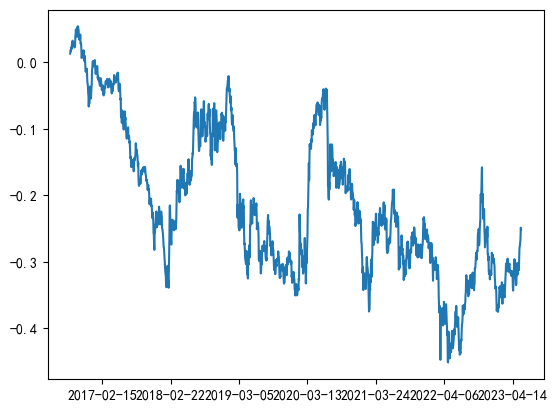

In [1295]:
CPratio_res50_03['未扣费累计收益'].plot()

<Axes: >

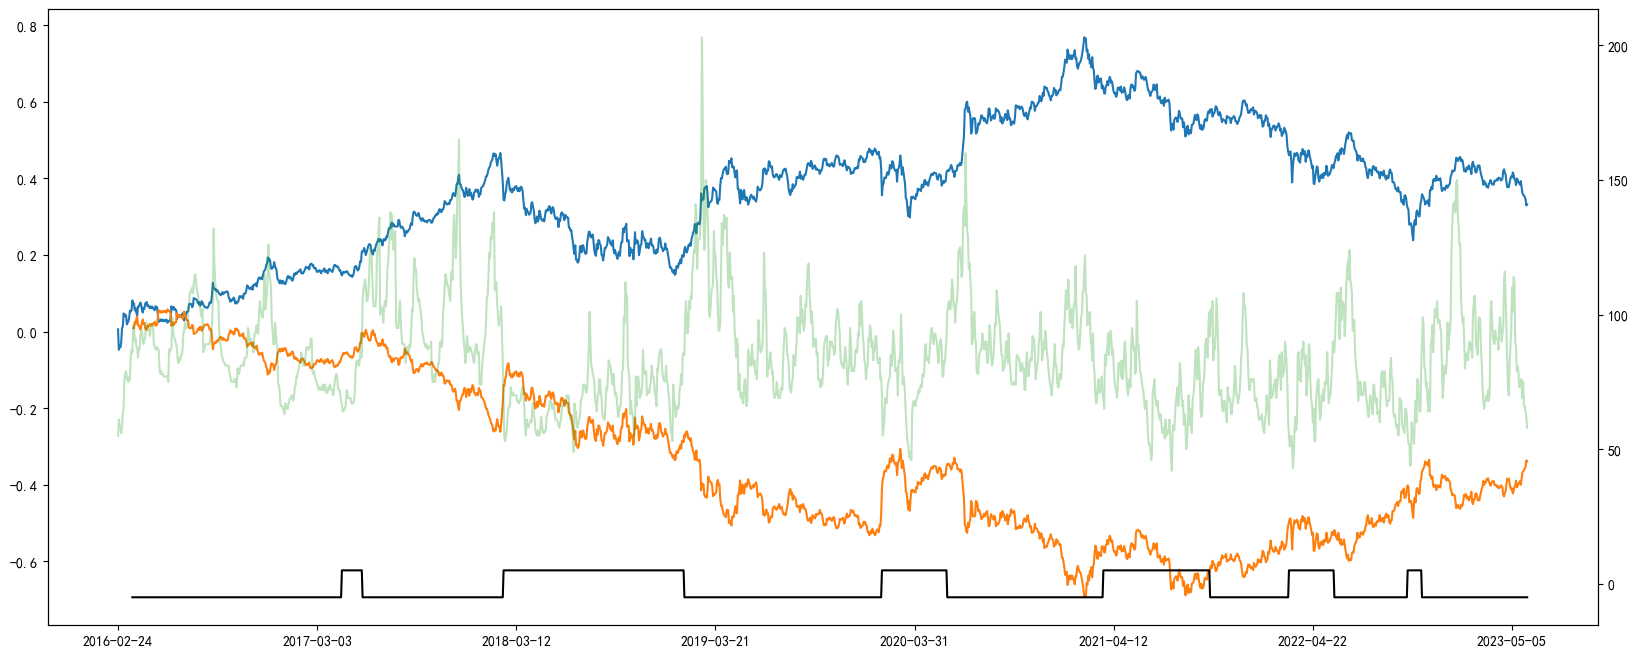

In [1298]:
CPratio_res50_01['收益率'].loc['2016-02-24':].cumsum().plot(figsize=(20,8))
CPratio_res50_01['未扣费累计收益'].loc['2016-02-24':].plot(figsize=(20,8))
CPratio_res50_01['P/C'].loc['2016-02-24':].plot(secondary_y=True,figsize=(20,8),alpha=0.3)
CPratio_res50_01['P/C240日Z值'].map(lambda x:-5 if x>1.5 else(5 if x<-1.5 else np.nan)).ffill().loc['2016-02-24':].plot(secondary_y=True,figsize=(20,8),color='black')

In [1297]:
pd.concat([
    CPratio_res50_01,
    CPratio_res50_02,
    CPratio_res50_03
]).to_excel('CPratio_res50_240Zvalue.xlsx')

### 值

In [415]:
same_dt = xy.Index_rets.loc['50',:].index & (CPratio50.shift(1)>1.4).index

In [419]:
(CPratio50.shift(1)>1.4)

TRADE_DATE
2015-02-09    False
2015-02-10     True
2015-02-11    False
2015-02-12    False
2015-02-13    False
              ...  
2023-05-29    False
2023-05-30    False
2023-05-31    False
2023-06-01    False
2023-06-02    False
Name: CPratio50, Length: 2023, dtype: bool

<Axes: >

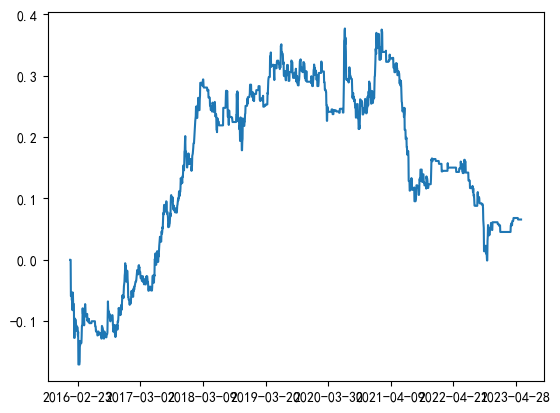

In [425]:
(xy.Index_rets.loc['50',same_dt]*(CPratio50.shift(1)>1.2)).cumsum().plot()

<Axes: >

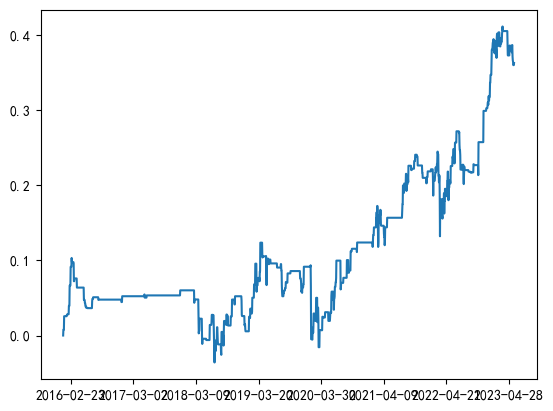

In [432]:
(xy.Index_rets.loc['50',same_dt]*(CPratio50.shift(1)<1.07)).cumsum().plot()

### 变化率

In [433]:
same_dt = xy.Index_rets.loc['50',:].index & (CPratio50.pct_change().shift(1)>0).index

In [419]:
(CPratio50.shift(1)>1.4)

TRADE_DATE
2015-02-09    False
2015-02-10     True
2015-02-11    False
2015-02-12    False
2015-02-13    False
              ...  
2023-05-29    False
2023-05-30    False
2023-05-31    False
2023-06-01    False
2023-06-02    False
Name: CPratio50, Length: 2023, dtype: bool

<Axes: >

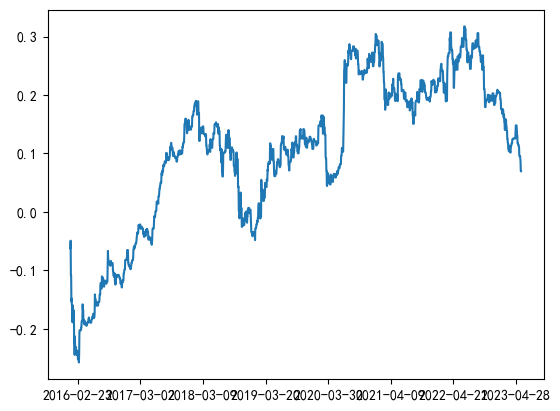

In [437]:
(xy.Index_rets.loc['50',same_dt]*(CPratio50.pct_change().shift(1)>0)).cumsum().plot()

<Axes: >

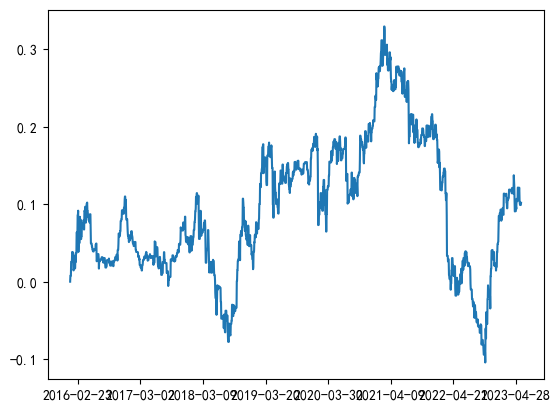

In [439]:
(xy.Index_rets.loc['50',same_dt]*(CPratio50.pct_change().shift(1)<-0.)).cumsum().plot()

In [364]:
same_dt = xy.Index_rets.columns & CPratio500.index
print(xy.Index_rets.loc['500',same_dt].rolling(1).mean().corr((CPratio50.loc[same_dt]).pct_change().rolling(1).mean().shift(1)))

f = (CPratio500.loc[same_dt]).pct_change().shift(1).dropna()

long = (xy.Index_rets.loc['500',f.index][(f>0).values]).dropna()
short = -(xy.Index_rets.loc['500',f.index][(f<0).values]).dropna()

# pd.concat([
#     long,
#     short
# ]).sort_index().cumsum().plot()

-0.16052717374533146


In [354]:
fore_ovn_money50, ovn_mom50 = get_ovn_money_mom(xy.IndexMin50jq)
fore_ovn_money300, ovn_mom300 = get_ovn_money_mom(xy.IndexMin300jq)
fore_ovn_money500, ovn_mom500 = get_ovn_money_mom(xy.IndexMin500jq)
fore_ovn_money1000, ovn_mom1000 = get_ovn_money_mom(xy.IndexMin1000jq)

NameError: name 'get_ovn_money_mom' is not defined

In [355]:
fore_ovn_money

NameError: name 'fore_ovn_money' is not defined

In [404]:
fore_ovn_money = pd.concat([
    fore_ovn_money50.rename('50'),
    fore_ovn_money300.rename('300'),
    fore_ovn_money500.rename('500'),
    fore_ovn_money1000.rename('1000')
],axis=1).shift(1).T

In [405]:
fore_ovn_mom

,2009-01-05,2009-01-06,2009-01-07,2009-01-08,2009-01-09,2009-01-12,2009-01-13,2009-01-14,2009-01-15,2009-01-16,...,2023-05-10,2023-05-11,2023-05-12,2023-05-15,2023-05-16,2023-05-17,2023-05-18,2023-05-19,2023-05-22,2023-05-23
50,NaN,-0.005297,0.0,-0.014508,-0.003198,-0.005258,-0.011628,0.0,-0.012333,0.003112,...,-0.001478,0.003366,-0.001124,-0.000380,0.000746,-0.001122,0.002265,-0.003025,-0.000759,0.001504
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000498,0.002508,-0.000251,0.000509,-0.000250,-0.001760,0.001772,-0.002532,-0.000254,0.000757
500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000322,0.000969,-0.000972,-0.000818,0.000000,-0.002443,0.001791,-0.001300,-0.000162,0.000000
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.001894,0.000756,-0.002270,0.000000,0.000381,0.000000,-0.000764,-0.000761,-0.001515,0.000759


In [406]:
fore_ovn_mom = pd.concat([
    ovn_mom50.rename('50'),
    ovn_mom300.rename('300'),
    ovn_mom500.rename('500'),
    ovn_mom1000.rename('1000')
],axis=1).T

In [407]:
ovn_trs50_1,ovn_trs50_2,ovn_trs50_3,ovn_trs50_4,ovn_trs50_5 = inraday_mom('50',fore_ovn_money,fore_ovn_mom,20)
ovn_trs300_1,ovn_trs300_2,ovn_trs300_3,ovn_trs300_4,ovn_trs300_5 = inraday_mom('300',fore_ovn_money,fore_ovn_mom,20)
ovn_trs500_1,ovn_trs500_2,ovn_trs500_3,ovn_trs500_4,ovn_trs500_5 = inraday_mom('500',fore_ovn_money,fore_ovn_mom,20)
ovn_trs1000_1,ovn_trs1000_2,ovn_trs1000_3,ovn_trs1000_4,ovn_trs1000_5 = inraday_mom('1000',fore_ovn_money,fore_ovn_mom,20)

In [408]:
ovn_TSR5 = pd.concat([
    ovn_trs50_5.rename('50'),
    ovn_trs300_5.rename('300'),
    ovn_trs500_5.rename('500'),
    ovn_trs1000_5.rename('1000')
],axis=1).shift(1).T

ovn_TSR1 = pd.concat([
    ovn_trs50_1.rename('50'),
    ovn_trs300_1.rename('300'),
    ovn_trs500_1.rename('500'),
    ovn_trs1000_1.rename('1000')
],axis=1).shift(1).T

New_ovn_TSR = (ovn_TSR5 - ovn_TSR5.mean())/ovn_TSR5.std() - (ovn_TSR1 - ovn_TSR1.mean())/ovn_TSR1.std()

-8.770686894034968e-05
1 1.0
2 1.0
3 1.0
4 1.0


<Axes: >

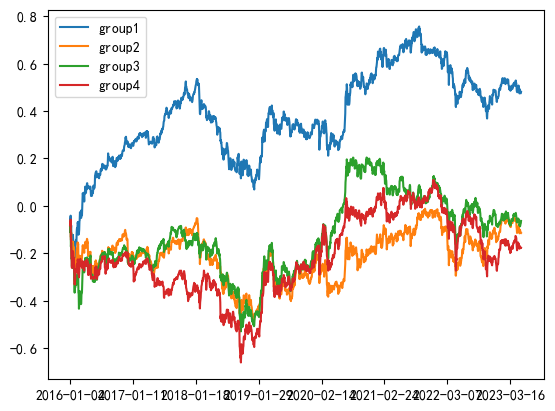

In [409]:
# 分组收益率
xy.cal_rate_group(
    New_ovn_TSR,
    xy.Index_rets,
    group_num=4,
    masks=1
).cumsum().plot()

<Axes: >

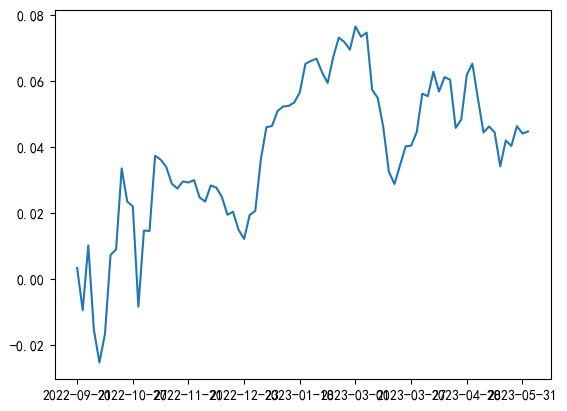

In [366]:
long.cumsum().plot()

<Axes: >

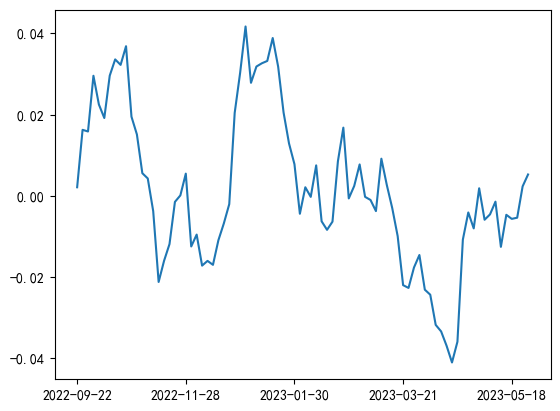

In [367]:
short.cumsum().plot()

In [308]:
f = (CPratio500.loc[same_dt]).pct_change().shift(1).dropna()

long = (xy.Index_rets.loc['500',f.index][(f>0).values]).dropna()
short = (-xy.Index_rets.loc['500',f.index][(f<0).values]).dropna()

pd.concat([
    long,
    short
]).sort_index().cumsum().plot()

#### 多头

shrh: 0.0 win%: 0.4791666666666667 gainloss%: -1.1443868486757478


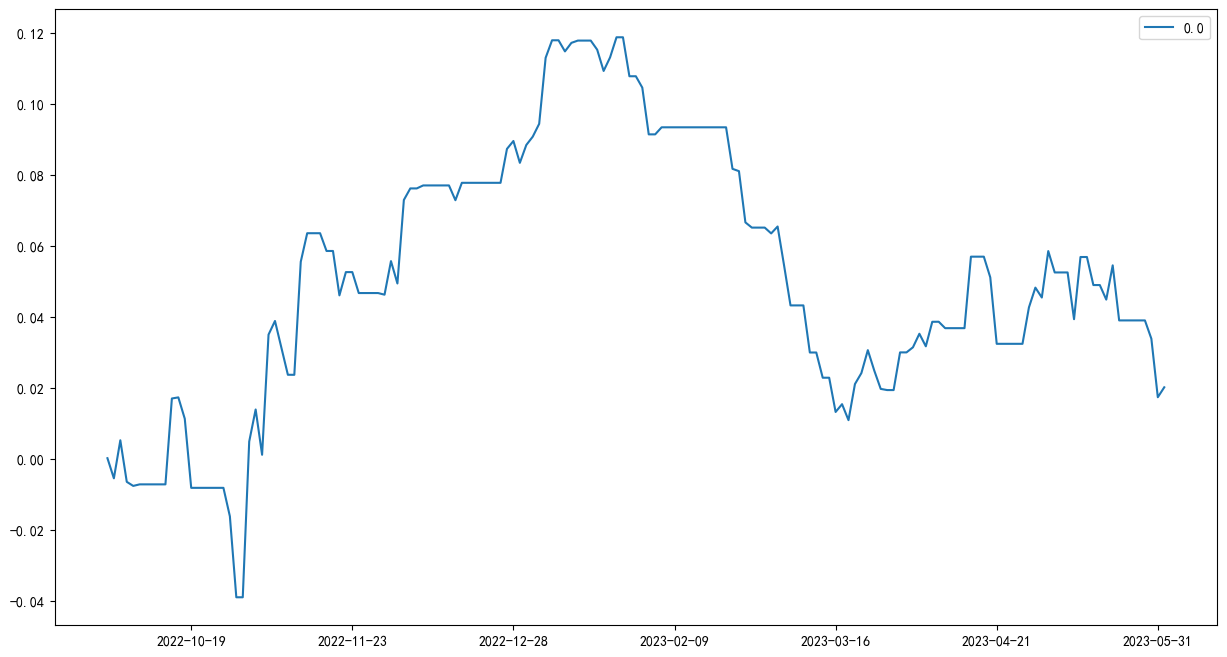

In [135]:
idx_name = '50'
for i in range(15)[::2]:
    i = i / 10
    same_dt = set(xy.Index_rets.T[idx_name].index) & set(f.dropna().index)
    ts_ret = xy.Index_rets.T[idx_name].loc[f[f>i].index&same_dt]
    
    if len(ts_ret) < 1:
        continue
        
    # if i < 1.4:
    #     continue

    win_pct = ts_ret[ts_ret>0].shape[0]/ts_ret.shape[0]
    win_loss_ratio = ts_ret[ts_ret>0].mean()/ts_ret[ts_ret<0].mean()
    
    print('shrh:',i, 'win%:', win_pct,'gainloss%:', win_loss_ratio)
    
    pd.Series(ts_ret.cumsum().rename(i),xy.Index_rets.T[idx_name].index).ffill().plot(legend=True,figsize=(15,8))
    
    if i == 0.8:
        break

In [238]:
ts_ret[ts_ret/ts_ret.shift()<0]

2016-01-05    0.007775
2016-01-07   -0.059137
2016-01-08    0.017896
2016-01-11   -0.044773
2016-01-12    0.005251
                ...   
2022-12-07   -0.005288
2022-12-08    0.000842
2022-12-12   -0.012118
2022-12-13    0.001107
2022-12-19   -0.015665
Name: 50, Length: 406, dtype: float64

#### 空头

shrh: 0.0 win%: 0.4976958525345622 gainloss%: -0.9456345567608521
shrh: 0.2 win%: 0.5036585365853659 gainloss%: -0.9324467286715544
shrh: 0.4 win%: 0.5065274151436031 gainloss%: -0.9112198314775933
shrh: 0.6 win%: 0.504297994269341 gainloss%: -0.9124547541108481


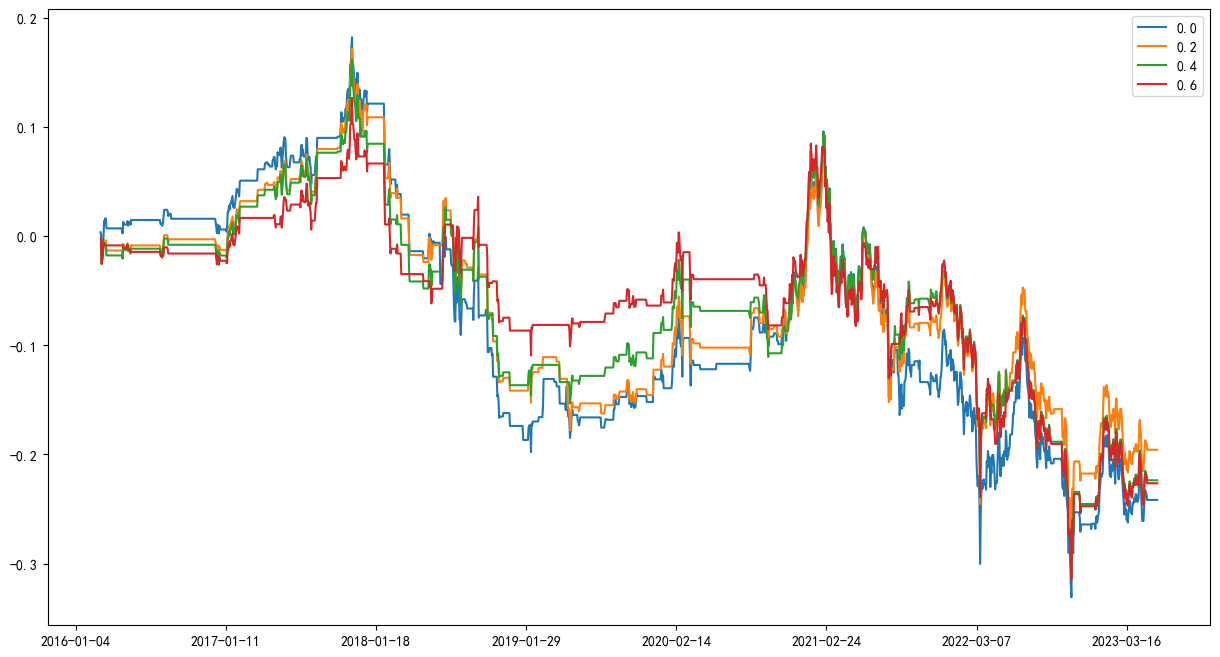

In [239]:
idx_name = '50'
for i in range(15)[::2]:
    i = i / 10
    same_dt = set(xy.Index_rets.T[idx_name].index) & set(New_TSR1_idx.T[idx_name].dropna().index)
    ts_ret = xy.Index_rets.T[idx_name].loc[New_TSR1_idx.T[idx_name][New_TSR1_idx.T[idx_name]<-i].index&same_dt]
    
    if len(ts_ret) < 1:
        continue
    
    
        
    win_pct = ts_ret[ts_ret>0].shape[0]/ts_ret.shape[0]
    win_loss_ratio = ts_ret[ts_ret>0].mean()/ts_ret[ts_ret<0].mean()
    print('shrh:',i, 'win%:', win_pct,'gainloss%:', win_loss_ratio)
    pd.Series(ts_ret.cumsum().rename(i), xy.Index_rets.T[idx_name].index).ffill().plot(legend=True,figsize=(15,8))
    
    if i == 0.6:
        break

In [240]:
ts_ret[ts_ret/ts_ret.shift()<0]

2016-03-11    0.004498
2016-03-17   -0.002175
2016-05-12    0.003092
2016-05-13   -0.004149
2016-08-02    0.000417
                ...   
2023-04-19   -0.008649
2023-04-25    0.000288
2023-04-26   -0.000479
2023-04-27    0.012449
2023-05-05   -0.002792
Name: 50, Length: 372, dtype: float64

## 评估

### cl-cl

-0.005304542389488867
1 1.0
2 1.0
3 1.0
4 1.0


<Axes: >

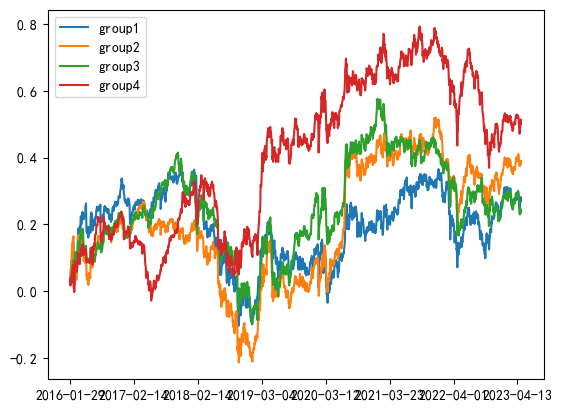

In [252]:
# 分组收益率
gr_ENPchange = xy.cal_rate_group(
    New_TSR,
    xy.Index_rets,
    group_num=4,
    masks=1
)
gr_ENPchange.cumsum().plot()

1200.0
yoy: 0.13930217658595143 
 mdd: -0.24263911959858697 
 sharpe: 0.8083180496890677 
 rankIC: 0.046514285714285716 
 rankIR: 0.060718360034692116 
 win%: 0.519327731092437 
 gain_loss%: -1.0222420349084191


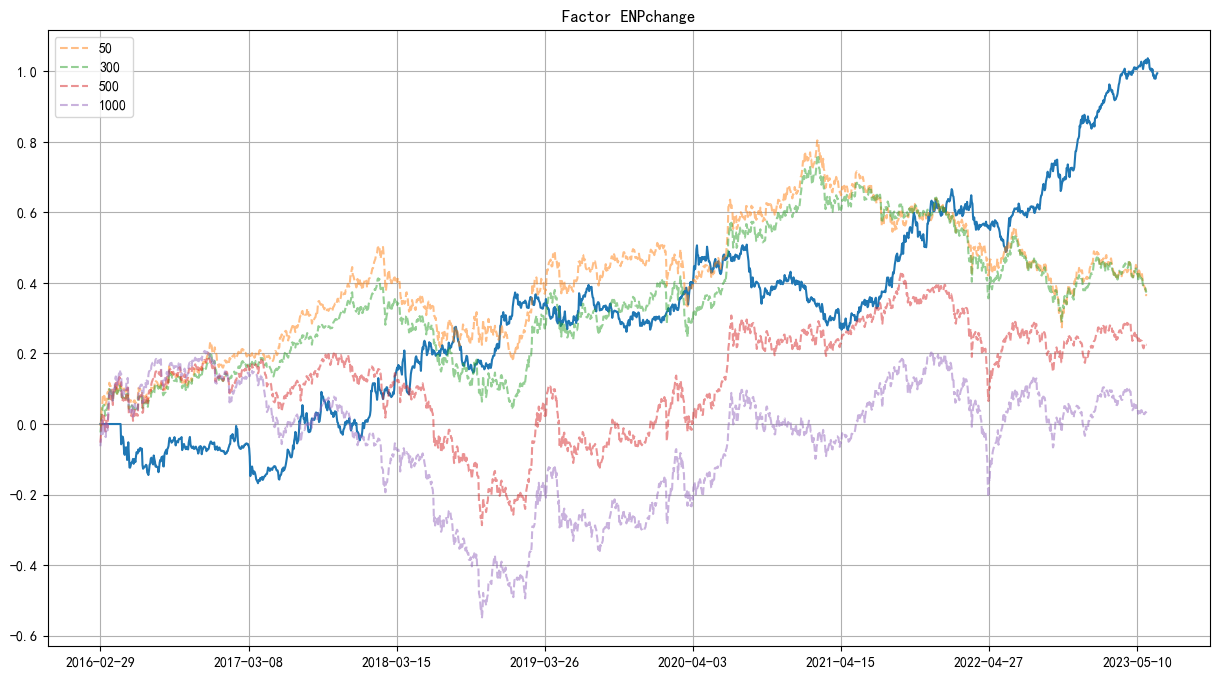

In [523]:
# 单因子强弱
ENPchange_select, ENPchange_rets = xy.single_Factor_backtest(
    New_TSR1_idx,
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-02-28':],
    _side=1,
    fee=0.000,
    name='ENPchange'
)

0.046514285714285716

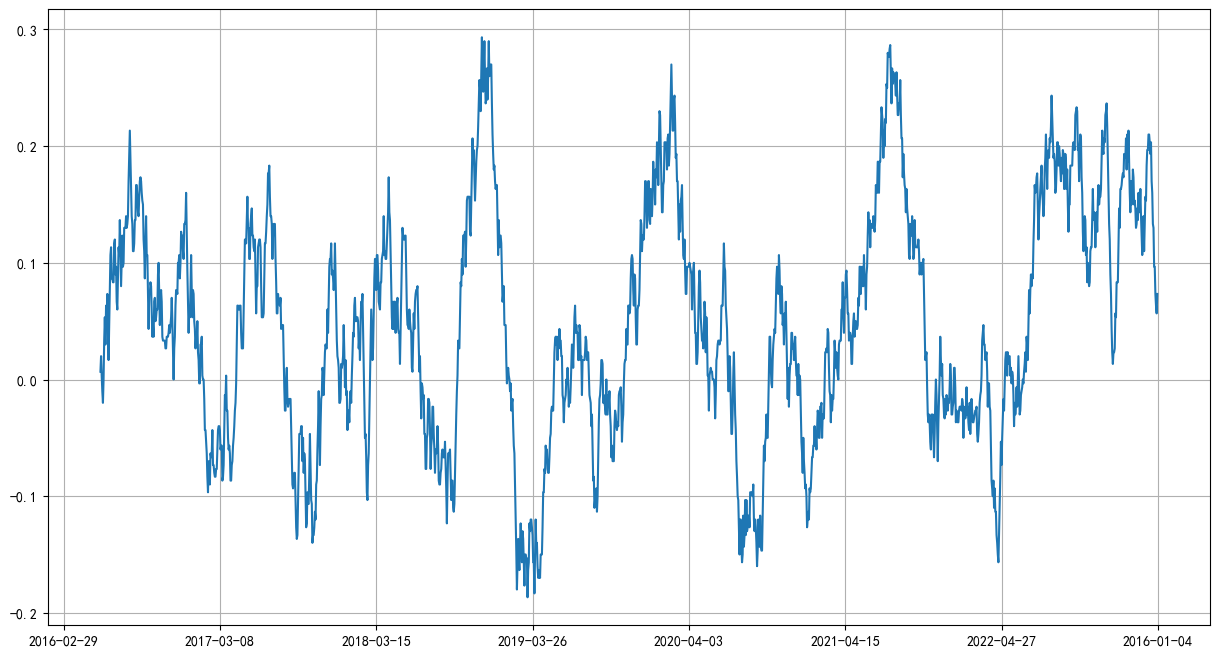

In [493]:
# 因子截面IC趋势
rankIC = xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-02-28':].rank(ascending=False).corrwith(New_TSR1_idx.rank(ascending=False))
rankIC.rolling(60).mean().plot(figsize=(15,8),grid=1)
rankIC.mean()

### cl_op

-0.05012971921705416
1 1.0
2 1.0
3 1.0
4 1.0


<Axes: >

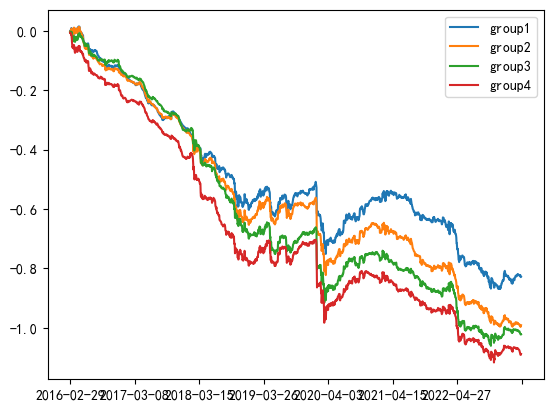

In [524]:
# 分组收益率
gr_ENPchange = xy.cal_rate_group(
    New_TSR1_idx.T.rolling(1).mean().T.loc[['50', '300', '500', '1000'],'2016-02-28':],
    xy.bonus_open_cl_rets.loc[['50', '300', '500', '1000'],'2016-02-28':],
    group_num=4,
    masks=1
)
gr_ENPchange.cumsum().plot()

1196.0
yoy: -0.037091003278173745 
 mdd: -0.31745989490437765 
 sharpe: -0.772221553049972 
 rankIC: -0.03474285714285715 
 rankIR: -0.0476398609918534 
 win%: 0.47314285714285714 
 gain_loss%: -0.9572870637371589


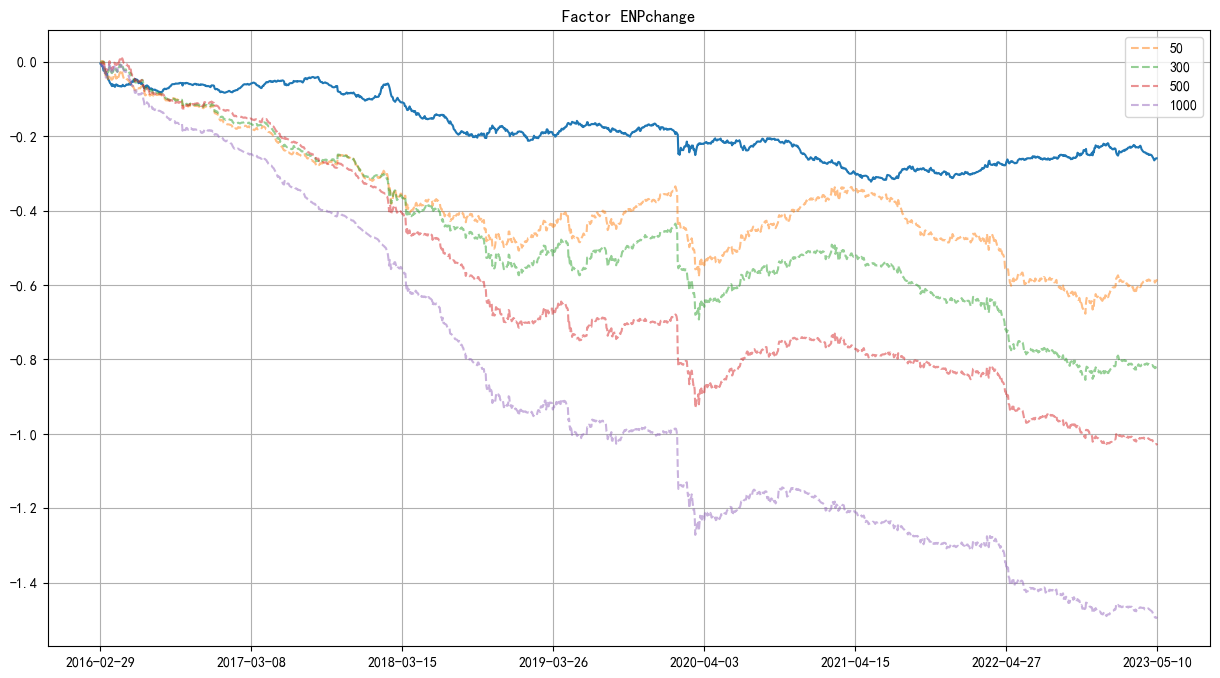

In [525]:
# 单因子强弱
ENPchange_select, ENPchange_rets = xy.single_Factor_backtest(
    New_TSR1_idx.T.rolling(1).mean().T.loc[['50', '300', '500', '1000'],'2016-02-28':],
    xy.bonus_open_cl_rets.loc[['50', '300', '500', '1000'],'2016-02-28':],
    _side=1,
    fee=0.000,
    name='ENPchange'
)

-0.03474285714285715

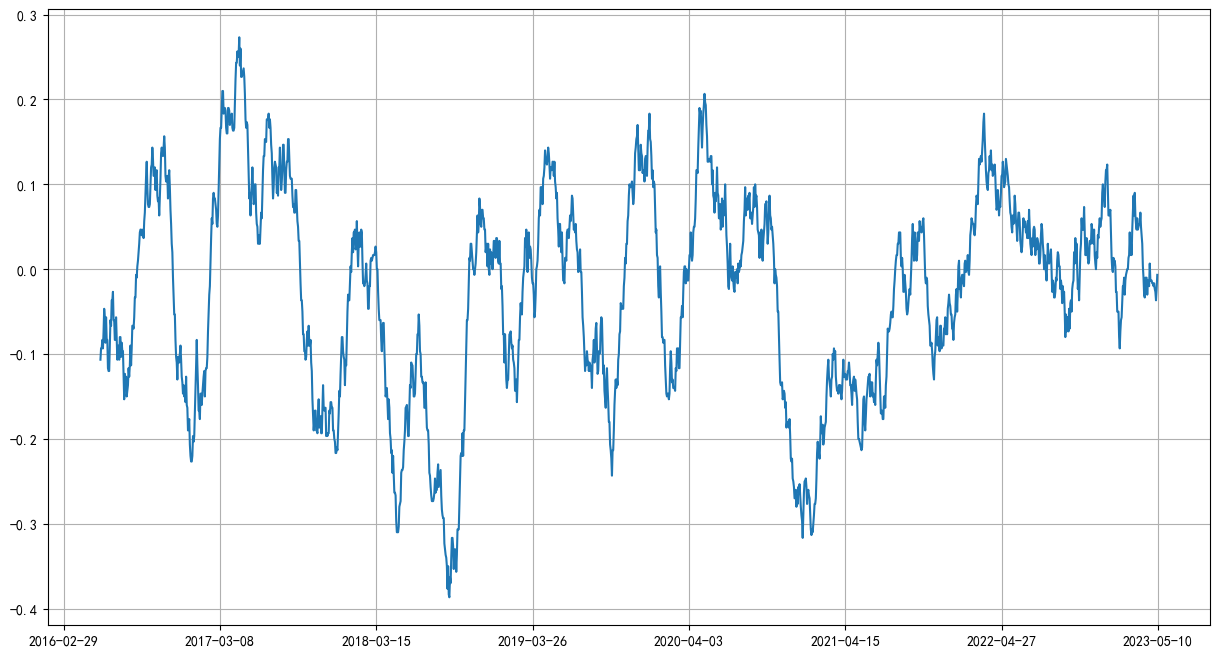

In [526]:
# 因子截面IC趋势
rankIC = xy.bonus_open_cl_rets.loc[['50', '300', '500', '1000'],'2016-02-28':].rank(ascending=False).corrwith(New_TSR1_idx.loc[['50', '300', '500', '1000'],'2016-02-28':].rank(ascending=False))
rankIC.rolling(60).mean().plot(figsize=(15,8),grid=1)
rankIC.mean()

### 择时

In [311]:
New_TSR

,2016-01-29,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-15,2016-02-16,2016-02-17,2016-02-18,...,2023-04-21,2023-04-24,2023-04-25,2023-04-26,2023-04-27,2023-04-28,2023-05-04,2023-05-05,2023-05-08,2023-05-09
50,0.147235,0.226462,1.930968,1.764611,1.508440,1.616129,1.754330,1.857371,1.925839,1.925839,...,-0.373158,0.157809,-0.898556,-0.218572,0.507251,1.803494,2.533228,2.403438,2.283654,2.237313
300,-0.350651,-0.180354,1.422594,1.234912,1.238376,1.420999,1.132818,0.808581,0.548959,0.548959,...,0.329314,-0.386280,-0.323111,0.273875,-1.049272,-1.349483,-1.132364,-2.331592,-2.250266,-2.602437
500,0.305772,-0.170631,-1.830181,-0.871996,-0.627495,-0.971579,-0.864574,-2.158523,-2.045980,-2.045980,...,0.521820,0.278926,1.243249,-0.667052,0.253414,-0.787568,-1.161915,-0.249733,-0.459283,0.304789
1000,-0.102355,0.124523,-1.523380,-2.127528,-2.119321,-2.065549,-2.022574,-0.507429,-0.428817,-0.428817,...,-0.477975,-0.050455,-0.021582,0.611749,0.288606,0.333557,-0.238948,0.177887,0.425895,0.060335


<Axes: >

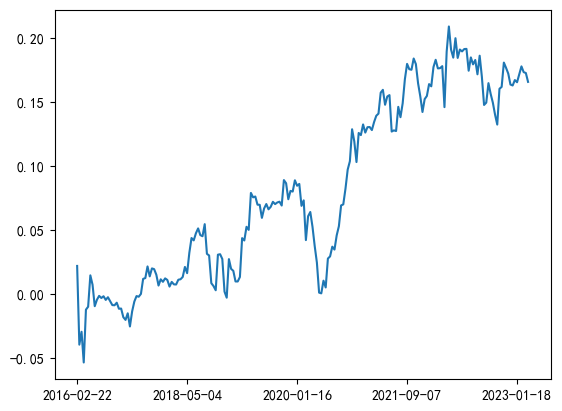

In [317]:
xy.Index_rets.T['300'].loc[New_TSR.T.dropna()['300'][New_TSR.T.dropna()['300']>1.5].index].cumsum().plot()

<Axes: >

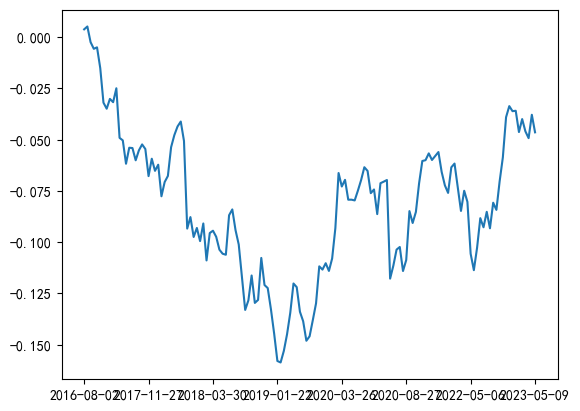

In [318]:
xy.Index_rets.T['300'].loc[New_TSR.T.dropna()['300'][New_TSR.T.dropna()['300']<-1.5].index].cumsum().plot()

In [249]:
New_TSR1_idx.to_csv(r'E:\PyProject\factors\NewFactor\st_TNR.csv')

In [250]:
New_TSR1_idx

,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,...,2023-04-21,2023-04-24,2023-04-25,2023-04-26,2023-04-27,2023-04-28,2023-05-04,2023-05-05,2023-05-08,2023-05-09
50,1.162610,1.178631,1.071053,1.074626,1.172423,1.285050,1.310740,1.336981,1.133745,1.127067,...,-1.403125,-1.293744,-1.175258,-1.489783,-1.418608,-1.378618,-1.321552,-0.932959,0.169829,-0.659408
300,0.279121,0.345265,0.455569,0.425751,0.317748,0.176470,0.047593,0.070889,0.265621,0.245809,...,0.334108,0.242778,0.428628,0.405793,0.106269,-0.044465,-0.009263,-0.164370,1.346187,-0.764973
500,-0.205534,-0.355443,-0.273406,-0.231368,-0.290028,-0.377569,-0.256579,-0.374990,-0.123074,-0.083570,...,0.117248,-0.072439,-0.387053,0.422912,0.416233,0.505567,0.236524,1.414836,-0.827962,1.407017
1000,-1.236198,-1.168453,-1.253216,-1.269009,-1.200143,-1.083950,-1.101754,-1.032880,-1.276292,-1.289307,...,0.951769,1.123405,1.133683,0.661078,0.896107,0.917517,1.094291,-0.317506,-0.688054,0.017364
